# **BSD3523 MACHINE LEARNING GROUP PROJECT**

**Group Name:** CSM1

**Group Leader:**

YIP YOONG ENG (SD23048)

**Group Members:**

MUHAMMAD AMIRUL AMIER BIN MOHD HUSNI (SD23011)

ALIYA AFIFAH BINTI AL ABAS (SD23062)

NUR IZZATI BINTI ZAKARIA (SD23007)

ALIA AYUNNI BINTI MOHD SHUKRI (SD23054)


## **IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import time
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score, roc_curve,auc,roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

Load the files from this [Google Drive Link](https://drive.google.com/drive/folders/1_DjDZ2Z1uY_APF-StLr__zUMaGtHbM-D?usp=drive_link) and upload accordingly.

In [ ]:
from google.colab import files
uploaded1 = files.upload()

Saving weather.csv to weather.csv


In [ ]:
from google.colab import files
uploaded2 = files.upload()

Saving production_index.csv to production_index.csv


In [ ]:
from google.colab import files
uploaded3 = files.upload()

Saving price_2022.csv to price_2022.csv


In [ ]:
from google.colab import files
uploaded4 = files.upload()

Saving price_2021.csv to price_2021.csv


In [ ]:
from google.colab import files
uploaded5 = files.upload()

Saving price_2020.csv to price_2020.csv


In [ ]:
from google.colab import files
uploaded6 = files.upload()

Saving export_number.csv to export_number.csv


In [ ]:
from google.colab import files
uploaded7 = files.upload()

Saving exchange_rates.csv to exchange_rates.csv


## **DATA INTEGRATION (MERGE SUPPORTING DATA AND MAIN DATA)**

In [2]:
weather_df = pd.read_csv('weather.csv')
weather_df['Date'] = pd.to_datetime(weather_df['Date'])

price2020_df = pd.read_csv('price_2020.csv')
price2020_df['Date'] = pd.to_datetime(price2020_df['Date'])

price2021_df = pd.read_csv('price_2021.csv')
price2021_df['Date'] = pd.to_datetime(price2021_df['Date'])

price2022_df = pd.read_csv('price_2022.csv')
price2022_df['Date'] = pd.to_datetime(price2022_df['Date'])

ipi_df = pd.read_csv('production_index.csv')
ipi_df['Date'] = pd.to_datetime(ipi_df['Date'])

export_df = pd.read_csv('export_number.csv')
export_df['Date'] = pd.to_datetime(export_df['Date'])

exchange_df = pd.read_csv('exchange_rates.csv')
exchange_df['Date'] = pd.to_datetime(exchange_df['Date'], format='%d-%m-%y')

/tmp/ipython-input-2638075488.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weather_df['Date'] = pd.to_datetime(weather_df['Date'])
/tmp/ipython-input-2638075488.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ipi_df['Date'] = pd.to_datetime(ipi_df['Date'])
/tmp/ipython-input-2638075488.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  export_df['Date'] = pd.to_datetime(export_df['Date'])


In [3]:
weather_df.tail(5)

,Date,Temp,Dew,Humidity,Precip,Precipprob,Precipcover,Windspeed,Winddir,Sealevelpressure,Cloudcover,Visibility,Solarradiation,Solarenergy,Uvindex,Moonphase
877,2022-05-27,28.9,24.4,78.0,0.53,100,4.17,19.6,216.4,1008.5,37.8,10.0,236.3,20.5,8,0.96
878,2022-05-28,28.6,23.9,77.2,0.18,100,4.17,14.1,140.5,1008.7,37.4,9.9,267.2,23.2,9,0.99
879,2022-05-29,29.5,23.4,71.9,0.00,0,0.00,15.3,192.4,1008.2,39.3,10.0,264.4,22.8,9,1.00
880,2022-05-30,29.9,23.6,70.7,0.00,0,0.00,14.1,243.4,1007.7,37.6,10.1,268.8,23.3,9,0.00
881,2022-05-31,30.2,23.8,69.9,0.00,0,0.00,17.7,264.7,1007.2,37.8,10.1,254.3,21.9,9,0.00


In [4]:
price2020_df.head(5)

,Date,Price
0,2020-01-02,3055.0
1,2020-01-03,3064.0
2,2020-01-06,3061.5
3,2020-01-07,3057.5
4,2020-01-08,3041.0


In [5]:
price2021_df.head(5)

,Date,Price
0,2021-01-04,3903.0
1,2021-01-05,3893.0
2,2021-01-06,3973.5
3,2021-01-07,3986.5
4,2021-01-08,3974.5


In [6]:
price2022_df.head(5)

,Date,Price
0,2022-01-03,5214.0
1,2022-01-04,5245.5
2,2022-01-05,5331.0
3,2022-01-06,5340.0
4,2022-01-07,5336.0


In [7]:
price2022_df.tail()

,Date,Price
152,2022-08-19,4153.0
153,2022-08-22,4210.5
154,2022-08-23,4196.0
155,2022-08-24,4258.5
156,2022-08-25,4290.0


In [8]:
ipi_df.head(5)

,Date,Index Production
0,2020-01-01,123.150
1,2020-02-01,115.001
2,2020-03-01,113.805
3,2020-04-01,73.110
4,2020-05-01,92.795


In [9]:
export_df.tail(5)

,Date,Export Number (in Tonnes)
31,2022-08-01,"1,299,930"
32,2022-09-01,"1,423,196"
33,2022-10-01,"1,505,769"
34,2022-11-01,"1,521,329"
35,2022-12-01,"1,468,448"


In [10]:
exchange_df.head(5)

,Date,USD
0,2020-01-02,4.0865
1,2020-01-03,4.0995
2,2020-01-06,4.1080
3,2020-01-07,4.0955
4,2020-01-08,4.1040


As you can see, the dates like January 4th and 5th, 2020 now have values, which were forward-filled from January 3rd's value. This ensures all dates have an exchange rate.

Since exchange rates is reported daily except for weekends, the weekend dates will be replaced with same value with Friday of the week. Whereas production index, and oil palm exports are reported as monthly data, the dates are converted to a daily frequency.

In [11]:
# Reset index if 'Date' is already the index to make it a column again
if 'Date' not in exchange_df.columns:
    exchange_df.reset_index(inplace=True)

# 'Date' column is already parsed correctly in the previous step, so no need to re-parse.
exchange_df.set_index('Date',inplace=True)

# conduct all date range in dataset
full_index = pd.date_range(
    start=exchange_df.index.min(),
    end=exchange_df.index.max(),
    freq='D'
)

# remove duplicate index entries before reindexing
exchanges_expanded = exchange_df[~exchange_df.index.duplicated(keep='first')]

exchanges_expanded = exchanges_expanded.reindex(full_index)

# ensure daily frequency
exchanges_expanded = exchanges_expanded.asfreq('D')

# forward fill missing days
exchanges_expanded = exchanges_expanded.ffill()

# Restore Date column
exchanges_expanded.index.name = 'Date'
exchanges_expanded = exchanges_expanded.reset_index()

exchanges_expanded.tail(5)

,Date,USD
1089,2022-12-26,4.4285
1090,2022-12-27,4.4210
1091,2022-12-28,4.4320
1092,2022-12-29,4.4190
1093,2022-12-30,4.4130


In [12]:
export_df['Date'] = pd.to_datetime(export_df['Date'], errors='coerce')
export_df.dropna(subset=['Date'], inplace=True)
export_df['year'] = export_df['Date'].dt.year
export_df['month'] = export_df['Date'].dt.month
export_expanded = ( export_df .assign(key=1) .merge(pd.DataFrame({'day': range(1, 32), 'key': 1}), on='key', how='left') .drop('key', axis=1) )
export_expanded['Date'] = pd.to_datetime( export_expanded['year'].astype(str) + '-' + export_expanded['month'].astype(str) + '-' + export_expanded['day'].astype(str), errors='coerce' )
export_expanded = export_expanded[export_expanded['Date'] <= '2022-08-25']
export_expanded = export_expanded[['Date', 'Export Number (in Tonnes)']]

In [13]:
export_expanded.tail(5)

,Date,Export Number (in Tonnes)
981,2022-08-21,"1,299,930"
982,2022-08-22,"1,299,930"
983,2022-08-23,"1,299,930"
984,2022-08-24,"1,299,930"
985,2022-08-25,"1,299,930"


In [14]:
ipi_df['Date'] = pd.to_datetime(ipi_df['Date'], errors='coerce')
ipi_df.dropna(subset=['Date'], inplace=True)

ipi_df['year'] = ipi_df['Date'].dt.year
ipi_df['month'] = ipi_df['Date'].dt.month

ipi_expanded = (
    ipi_df
    .assign(key=1)
    .merge(pd.DataFrame({'day': range(1, 32), 'key':1}), on='key', how='left')
    .drop('key', axis=1)
)

ipi_expanded['Date'] = pd.to_datetime(
    ipi_expanded['year'].astype(str) + '-' +
    ipi_expanded['month'].astype(str) + '-' +
    ipi_expanded['day'].astype(str),
    errors='coerce'
)

ipi_expanded = ipi_expanded[ipi_expanded['Date'] <= '2022-08-25']
ipi_expanded = ipi_expanded[['Date', 'Index Production']]
ipi_expanded = ipi_expanded.drop_duplicates(subset=['Date']).reset_index(drop=True)

In [15]:
ipi_expanded.tail(5)

,Date,Index Production
963,2022-08-21,144.496
964,2022-08-22,144.496
965,2022-08-23,144.496
966,2022-08-24,144.496
967,2022-08-25,144.496


In [16]:
price2020_df['Date'] = pd.to_datetime(price2020_df['Date'], errors='coerce')
price2020_df.dropna(subset=['Date'], inplace=True)

price2020_df['year'] = price2020_df['Date'].dt.year
price2020_df['month'] = price2020_df['Date'].dt.month

months = pd.DataFrame({'month': range(1, 13)})
months['year'] = 2020


days = pd.DataFrame({'day': range(1, 32)})
expanded = months.merge(days, how='cross')  # cross join to get all day-month combinations

expanded['Date'] = pd.to_datetime(
    expanded['year'].astype(str) + '-' +
    expanded['month'].astype(str) + '-' +
    expanded['day'].astype(str),
    errors='coerce'
)

expanded = expanded[['Date']].dropna()

price2020_expanded = pd.merge(
    expanded,
    price2020_df[['Date', 'Price']],
    on='Date',
    how='left'
)

price2020_expanded = price2020_expanded.sort_values('Date').reset_index(drop=True)

In [17]:
price2020_expanded.tail(5)

,Date,Price
361,2020-12-27,NaN
362,2020-12-28,3780.5
363,2020-12-29,3788.0
364,2020-12-30,NaN
365,2020-12-31,NaN


In [18]:
price2021_df['Date'] = pd.to_datetime(price2021_df['Date'], errors='coerce')
price2021_df.dropna(subset=['Date'], inplace=True)

price2021_df['year'] = price2021_df['Date'].dt.year
price2021_df['month'] = price2021_df['Date'].dt.month

months = pd.DataFrame({'month': range(1, 13)})
months['year'] = 2021

days = pd.DataFrame({'day': range(1, 32)})
expanded = months.merge(days, how='cross')

expanded['Date'] = pd.to_datetime(
    expanded['year'].astype(str) + '-' +
    expanded['month'].astype(str) + '-' +
    expanded['day'].astype(str),
    errors='coerce'
)

expanded = expanded[['Date']].dropna()
price2021_expanded = pd.merge(
    expanded,
    price2021_df[['Date', 'Price']],
    on='Date',
    how='left'
)

price2021_expanded = price2021_expanded[['Date', 'Price']]
price2021_expanded = price2021_expanded.sort_values('Date').reset_index(drop=True)

In [19]:
price2021_expanded.tail(5)

,Date,Price
360,2021-12-27,5080.0
361,2021-12-28,5143.0
362,2021-12-29,5142.5
363,2021-12-30,5150.0
364,2021-12-31,NaN


In [20]:
price2022_df['Date'] = pd.to_datetime(price2022_df['Date'], errors='coerce')
price2022_df.dropna(subset=['Date'], inplace=True)

price2022_df['year'] = price2022_df['Date'].dt.year
price2022_df['month'] = price2022_df['Date'].dt.month

months = pd.DataFrame({'month': range(1, 13)})
months['year'] = 2022


days = pd.DataFrame({'day': range(1, 32)})
expanded = months.merge(days, how='cross')

expanded['Date'] = pd.to_datetime(
    expanded['year'].astype(str) + '-' +
    expanded['month'].astype(str) + '-' +
    expanded['day'].astype(str),
    errors='coerce'
)

price2022_expanded = pd.merge(
    expanded,
    price2022_df[['Date', 'Price']],
    on='Date',
    how='left'
)

price2022_expanded = price2022_expanded[price2022_expanded['Date'] <= '2022-08-25']
price2022_expanded = price2022_expanded.sort_values('Date').reset_index(drop=True)
price2022_expanded = price2022_expanded[['Date', 'Price']]

In [21]:
price2022_expanded.tail(5)

,Date,Price
232,2022-08-21,NaN
233,2022-08-22,4210.5
234,2022-08-23,4196.0
235,2022-08-24,4258.5
236,2022-08-25,4290.0


Now, all the dataframes are presented at a daily frequency, where the values of exchange, IPI, and export are expanded to each day, so that each day has the same value. This allows the datasets to be combined more easily with other dataframes.

In [22]:
# Combine all price dataframes vertically
all_prices_df = pd.concat([
    price2020_expanded,
    price2021_expanded,
    price2022_expanded
], ignore_index=True)

# Sort by Date and reset index for a clean combined DataFrame
all_prices_df = all_prices_df.sort_values(by='Date').reset_index(drop=True)

# Display the head of the combined DataFrame
print("Combined Price DataFrame (all_prices_df):")
all_prices_df.tail()

Combined Price DataFrame (all_prices_df):


,Date,Price
963,2022-08-21,NaN
964,2022-08-22,4210.5
965,2022-08-23,4196.0
966,2022-08-24,4258.5
967,2022-08-25,4290.0


In [23]:
# Reset index if 'Date' is already the index to make it a column again
if 'Date' not in all_prices_df.columns:
    all_prices_df.reset_index(inplace=True)

# 'Date' column is already parsed correctly in the previous step, so no need to re-parse.
all_prices_df.set_index('Date',inplace=True)

# conduct all date range in dataset
full_index = pd.date_range(
    start=all_prices_df.index.min(),
    end=all_prices_df.index.max(),
    freq='D'
)

# remove duplicate index entries before reindexing
all_prices_df = all_prices_df[~all_prices_df.index.duplicated(keep='first')]

all_prices_df = all_prices_df.reindex(full_index)

# ensure daily frequency
all_prices_df = all_prices_df.asfreq('D')

# forward fill missing days
all_prices_df = all_prices_df.ffill()

# Restore Date column
all_prices_df.index.name = 'Date'
all_prices_df = all_prices_df.reset_index()

all_prices_df.tail(7)

,Date,Price
961,2022-08-19,4153.0
962,2022-08-20,4153.0
963,2022-08-21,4153.0
964,2022-08-22,4210.5
965,2022-08-23,4196.0
966,2022-08-24,4258.5
967,2022-08-25,4290.0


In [24]:
df = weather_df.copy()
df = pd.merge(df, ipi_expanded, on='Date', how='left')
df = pd.merge(df, all_prices_df, on='Date', how='left')
df = pd.merge(df, export_expanded, on='Date', how='left')
df = pd.merge(df, exchanges_expanded, on='Date', how='left')

In [25]:
df

,Date,Temp,Dew,Humidity,Precip,Precipprob,Precipcover,Windspeed,Winddir,Sealevelpressure,Cloudcover,Visibility,Solarradiation,Solarenergy,Uvindex,Moonphase,Index Production,Price,Export Number (in Tonnes),USD
0,2020-01-01,29.3,22.8,69.5,0.00,0,0.00,14.0,84.0,1013.0,37.8,9.7,277.3,24.0,9,0.17,123.150,NaN,"1,213,539",NaN
1,2020-02-01,28.5,24.1,78.0,1.16,100,4.17,13.9,99.1,1013.8,44.3,9.7,243.7,21.1,9,0.22,115.001,2680.0,"1,082,417",4.0885
2,2020-03-01,28.2,24.6,82.3,11.95,100,8.33,12.1,147.9,1012.5,39.5,9.5,252.2,21.9,9,0.26,113.805,2413.5,"1,184,702",4.2260
3,2020-04-01,28.5,24.7,80.7,0.35,100,4.17,14.1,172.3,1010.7,40.7,8.8,265.1,22.9,9,0.31,73.110,2472.5,"1,236,478",4.3275
4,2020-05-01,28.5,23.9,77.2,0.00,0,0.00,13.5,179.2,1011.0,39.7,9.0,278.6,24.1,10,0.36,92.795,2096.5,"1,369,351",4.3260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,2022-05-27,28.9,24.4,78.0,0.53,100,4.17,19.6,216.4,1008.5,37.8,10.0,236.3,20.5,8,0.96,128.772,7095.5,"1,369,714",4.3825
878,2022-05-28,28.6,23.9,77.2,0.18,100,4.17,14.1,140.5,1008.7,37.4,9.9,267.2,23.2,9,0.99,128.772,7095.5,"1,369,714",4.3825
879,2022-05-29,29.5,23.4,71.9,0.00,0,0.00,15.3,192.4,1008.2,39.3,10.0,264.4,22.8,9,1.00,128.772,7095.5,"1,369,714",4.3825
880,2022-05-30,29.9,23.6,70.7,0.00,0,0.00,14.1,243.4,1007.7,37.6,10.1,268.8,23.3,9,0.00,128.772,6787.5,"1,369,714",4.3705


In [26]:
print(df.columns)

Index(['Date', 'Temp', 'Dew', 'Humidity', 'Precip', 'Precipprob',
       'Precipcover', 'Windspeed', 'Winddir', 'Sealevelpressure', 'Cloudcover',
       'Visibility', 'Solarradiation', 'Solarenergy', 'Uvindex', 'Moonphase',
       'Index Production', 'Price', 'Export Number (in Tonnes)', 'USD'],
      dtype='object')


Data is loaded and named as **df**, to be used in data preprocessing.

**CHECK DATA TYPE FOR DATASET**

In [27]:
df.dtypes

,0
Date,datetime64[ns]
Temp,float64
Dew,float64
Humidity,float64
Precip,float64
Precipprob,int64
Precipcover,float64
Windspeed,float64
Winddir,float64
Sealevelpressure,float64


Export Number variables supposedly in numerical format rather in object (string) data type. Therefore, the data type must be revised.

In [28]:
numeric_cols = ['Export Number (in Tonnes)']

for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace(',', '', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')


In [29]:
df.dtypes

,0
Date,datetime64[ns]
Temp,float64
Dew,float64
Humidity,float64
Precip,float64
Precipprob,int64
Precipcover,float64
Windspeed,float64
Winddir,float64
Sealevelpressure,float64


All variables are numerical except for the date variable. Therefore, if there are missing values in this dataset, we can replaced using the mean or median, which can only be calculated from numerical data.

## **DATA PREPROCESSING**

**CHECK MISSING VALUES AND DUPLICATES**

In [30]:
df.isnull().sum()

,0
Date,0
Temp,0
Dew,0
Humidity,0
Precip,0
Precipprob,0
Precipcover,0
Windspeed,0
Winddir,0
Sealevelpressure,1


In [31]:
df.shape

(882, 20)

In [32]:
df.duplicated().sum()

np.int64(0)

There is no duplicated rows in the data but missing values exist.

**MISSING VALUE IMPUTATION**




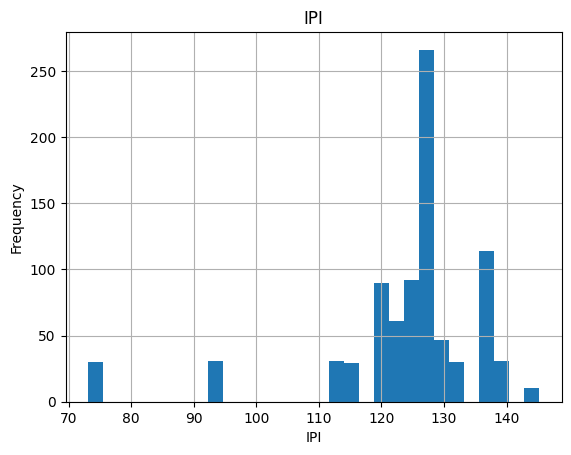

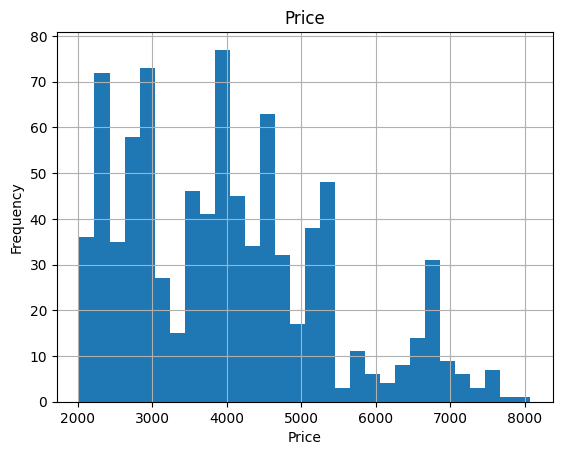

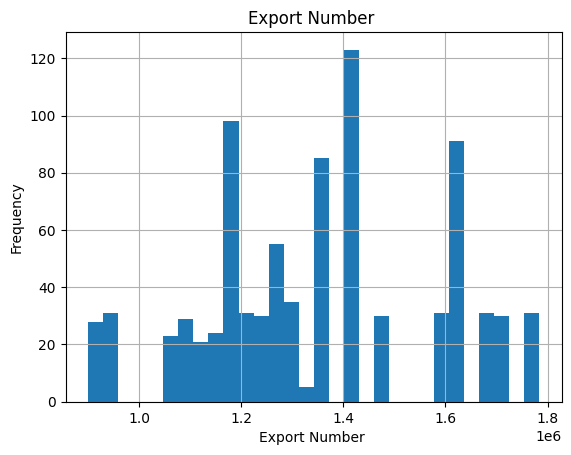

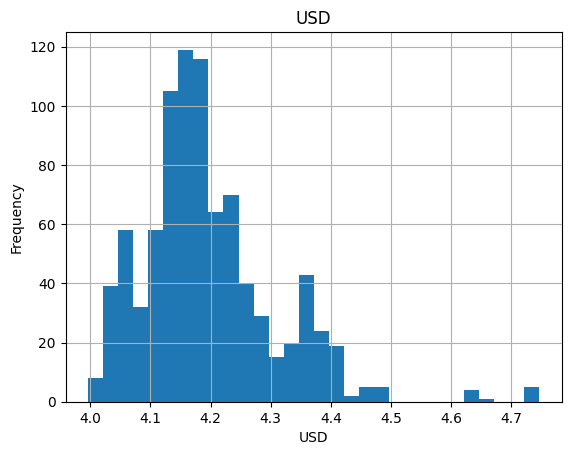

In [33]:
import matplotlib.pyplot as plt

for col in ['Index Production', 'Price', 'Export Number (in Tonnes)', 'USD']:
    plt.figure()
    df[col].hist(bins=30)
    # Clean, simple titles
    title = col.replace('(in Tonnes)', '').replace('Index Production', 'IPI')
    plt.title(title)
    plt.xlabel(title)
    plt.ylabel('Frequency')
    plt.show()


The distribution of all relevant variables (Price, Export Number (in Tonnes), Index Production, USD) are examined. They shows skewness and do not follow a perfect bell shape. Therefore, we decided to replace missing values with the median because the median is robust to skewed distributions and outliers, ensuring a more reliable imputation.

In [34]:
# Set Date as index for time series operations
df_imputed = df.set_index('Date').copy()

# Column to impute with rolling mean
col_to_roll_impute = 'Export Number (in Tonnes)'

# Apply rolling mean imputation for 'Export Number (in Tonnes)'
# Calculate 30-day rolling mean
# min_periods=1 ensures a mean is calculated even if fewer than 30 values are available (e.g., at the start of the series)
rolling_mean = df_imputed[col_to_roll_impute].rolling(window=30, min_periods=1).mean()
# Fill NaN values with rolling mean
df_imputed[col_to_roll_impute] = df_imputed[col_to_roll_impute].fillna(rolling_mean)
# Fallback to median for any remaining NaNs (e.g., if first 30 days are all NaN)
df_imputed[col_to_roll_impute] = df_imputed[col_to_roll_impute].fillna(df_imputed[col_to_roll_impute].median())

# Columns to impute with median (reverting others)
cols_to_median_impute = ['Price', 'Index Production', 'USD']
for col in cols_to_median_impute:
    df_imputed[col] = df_imputed[col].fillna(df_imputed[col].median())

# Reset index to make 'Date' a column again
df = df_imputed.reset_index()

# Handle Sealevelpressure as before
df = df.dropna(subset=['Sealevelpressure'])

df.isnull().sum()

,0
Date,0
Temp,0
Dew,0
Humidity,0
Precip,0
Precipprob,0
Precipcover,0
Windspeed,0
Winddir,0
Sealevelpressure,0


Median was choosen to replace missing values because of their robust to outliers and is appropiate for skewed data.

We decided to drop missing value in variable Sealevelpressure, since the missing value less than 5.

In [35]:
df

,Date,Temp,Dew,Humidity,Precip,Precipprob,Precipcover,Windspeed,Winddir,Sealevelpressure,Cloudcover,Visibility,Solarradiation,Solarenergy,Uvindex,Moonphase,Index Production,Price,Export Number (in Tonnes),USD
0,2020-01-01,29.3,22.8,69.5,0.00,0,0.00,14.0,84.0,1013.0,37.8,9.7,277.3,24.0,9,0.17,123.150,3931.0,1213539.0,4.1795
1,2020-02-01,28.5,24.1,78.0,1.16,100,4.17,13.9,99.1,1013.8,44.3,9.7,243.7,21.1,9,0.22,115.001,2680.0,1082417.0,4.0885
2,2020-03-01,28.2,24.6,82.3,11.95,100,8.33,12.1,147.9,1012.5,39.5,9.5,252.2,21.9,9,0.26,113.805,2413.5,1184702.0,4.2260
3,2020-04-01,28.5,24.7,80.7,0.35,100,4.17,14.1,172.3,1010.7,40.7,8.8,265.1,22.9,9,0.31,73.110,2472.5,1236478.0,4.3275
4,2020-05-01,28.5,23.9,77.2,0.00,0,0.00,13.5,179.2,1011.0,39.7,9.0,278.6,24.1,10,0.36,92.795,2096.5,1369351.0,4.3260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,2022-05-27,28.9,24.4,78.0,0.53,100,4.17,19.6,216.4,1008.5,37.8,10.0,236.3,20.5,8,0.96,128.772,7095.5,1369714.0,4.3825
878,2022-05-28,28.6,23.9,77.2,0.18,100,4.17,14.1,140.5,1008.7,37.4,9.9,267.2,23.2,9,0.99,128.772,7095.5,1369714.0,4.3825
879,2022-05-29,29.5,23.4,71.9,0.00,0,0.00,15.3,192.4,1008.2,39.3,10.0,264.4,22.8,9,1.00,128.772,7095.5,1369714.0,4.3825
880,2022-05-30,29.9,23.6,70.7,0.00,0,0.00,14.1,243.4,1007.7,37.6,10.1,268.8,23.3,9,0.00,128.772,6787.5,1369714.0,4.3705


## **EXPLORATORY DATA ANALYSIS**

**Descriptive Statistics**

In [36]:
display(df.describe(include='all'))

,Date,Temp,Dew,Humidity,Precip,Precipprob,Precipcover,Windspeed,Winddir,Sealevelpressure,Cloudcover,Visibility,Solarradiation,Solarenergy,Uvindex,Moonphase,Index Production,Price,Export Number (in Tonnes),USD
count,881,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,8.810000e+02,881.000000
mean,2021-03-23 05:15:27.582292736,28.141998,23.790238,78.683087,7.447923,65.607264,4.063258,15.702611,151.702270,1009.640863,38.514415,9.586266,196.393417,16.948014,6.906924,0.502270,124.198482,4012.238933,1.345621e+06,4.196404
min,2020-01-01 00:00:00,23.800000,19.900000,61.700000,0.000000,0.000000,0.000000,5.400000,52.600000,1006.100000,8.300000,5.700000,53.400000,4.600000,2.000000,0.000000,73.110000,2021.500000,9.005580e+05,3.996500
25%,2020-08-08 00:00:00,27.400000,23.300000,74.800000,0.000000,0.000000,0.000000,13.700000,119.900000,1008.800000,37.800000,9.400000,153.700000,13.300000,6.000000,0.250000,122.830000,2874.500000,1.184702e+06,4.131000
50%,2021-03-16 00:00:00,28.200000,23.800000,79.000000,0.580000,100.000000,4.170000,15.700000,143.100000,1009.700000,38.600000,9.700000,191.100000,16.500000,7.000000,0.500000,127.097000,3931.000000,1.350777e+06,4.179500
75%,2021-10-22 00:00:00,28.900000,24.300000,82.700000,7.070000,100.000000,8.330000,17.500000,175.200000,1010.600000,39.600000,10.000000,239.500000,20.700000,9.000000,0.750000,128.772000,4749.500000,1.465518e+06,4.241500
max,2022-12-05 00:00:00,31.100000,27.200000,95.700000,168.070000,100.000000,16.670000,38.000000,314.300000,1013.800000,58.100000,10.200000,314.500000,27.300000,10.000000,1.000000,145.197000,8076.500000,1.783284e+06,4.746500
std,NaN,1.090280,0.957872,5.885145,15.554729,47.528701,3.687339,3.646294,45.678013,1.320403,3.701972,0.545960,56.541835,4.870208,1.905246,0.307469,13.165594,1339.027668,2.215555e+05,0.111702


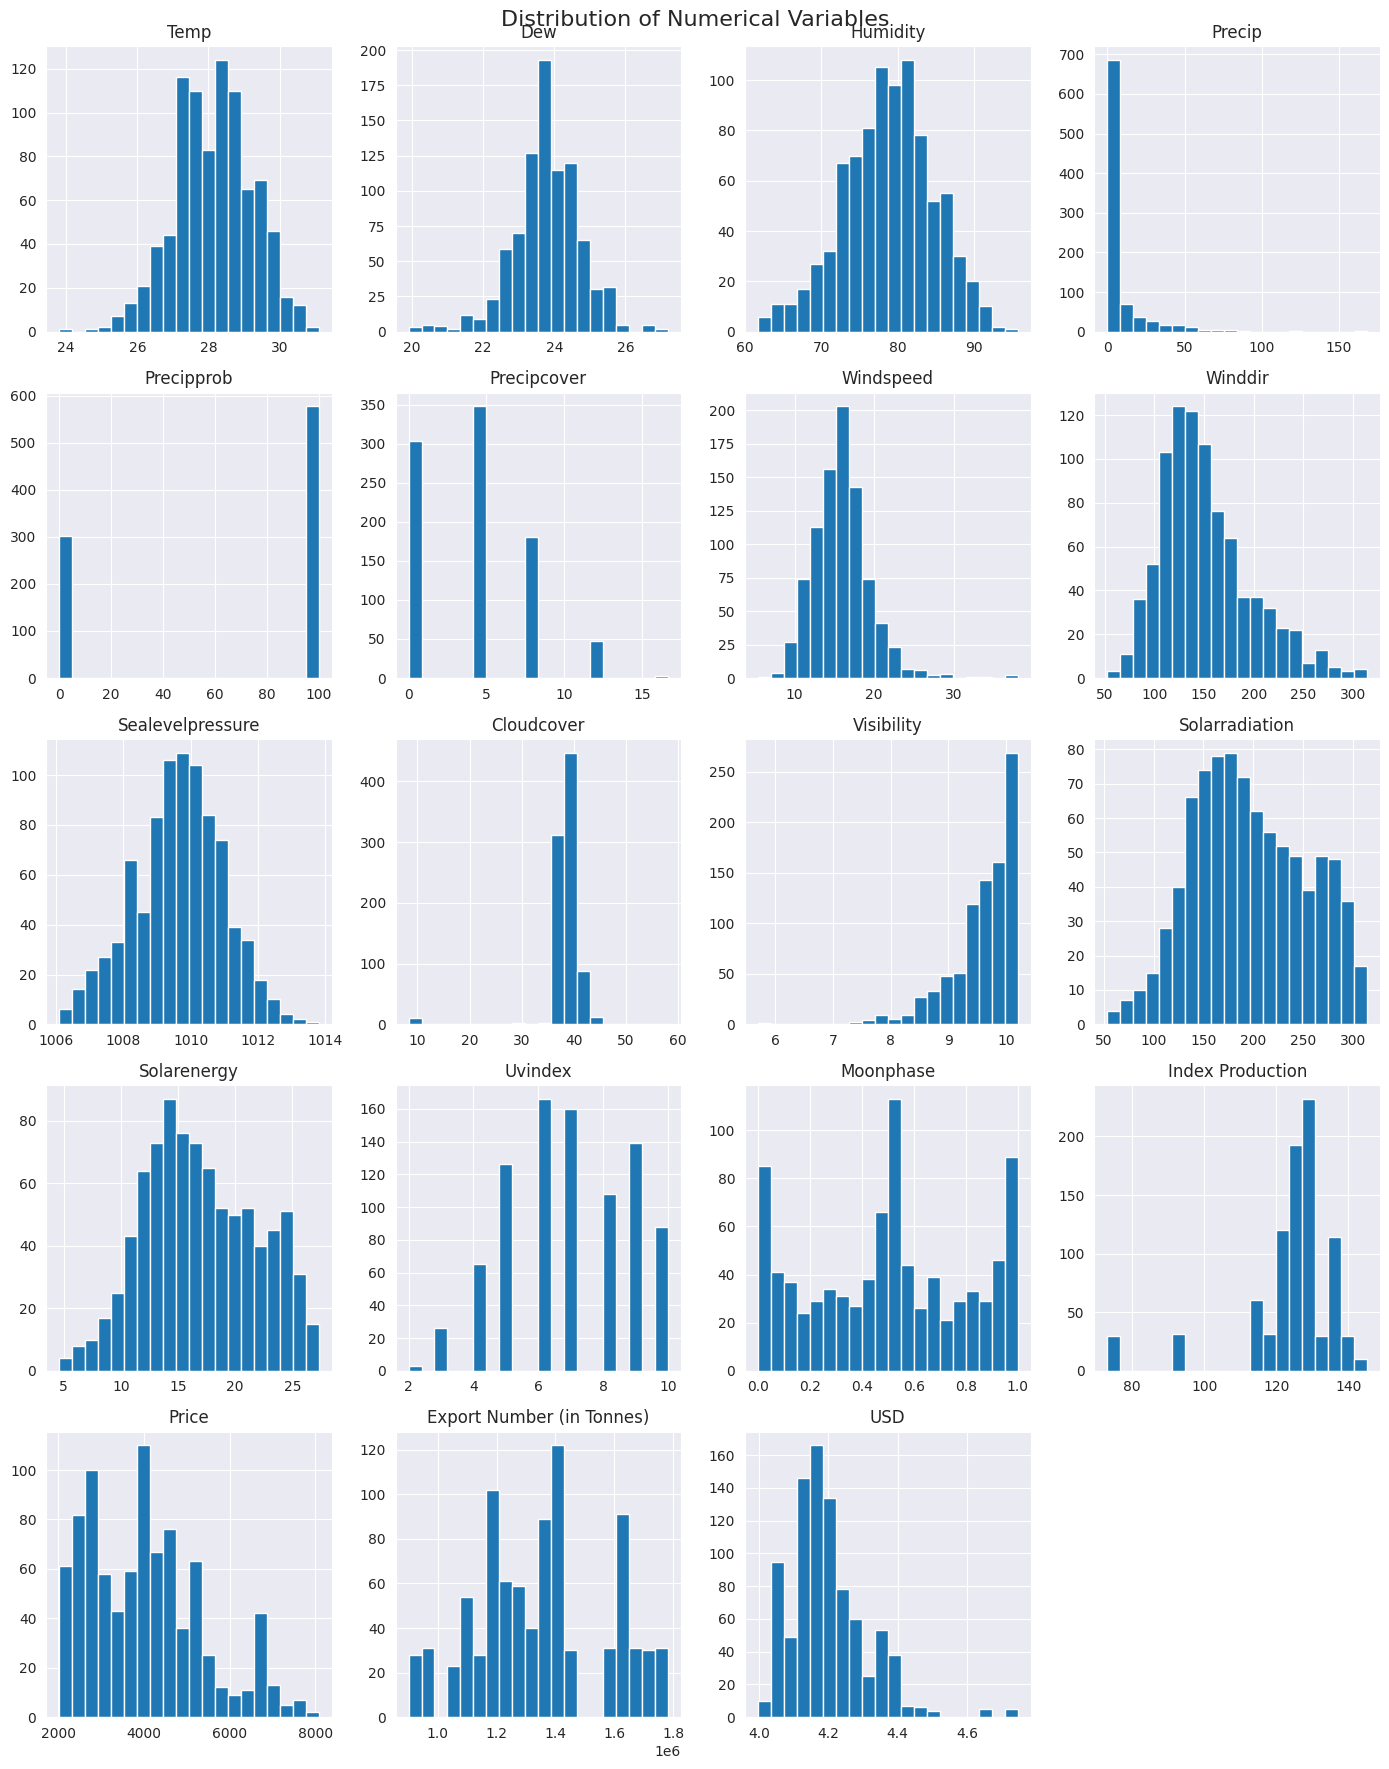

In [37]:
sns.set_style("darkgrid")

numerical_columns = df.select_dtypes(include=["int64", "float64"])

numerical_columns.hist(figsize=(14, 18), bins=20)

plt.suptitle("Distribution of Numerical Variables", fontsize=16)
plt.tight_layout()
plt.show()

**Correlation Matrix**

In [38]:
corr_matrix = df.drop(columns=['Date']).corr(numeric_only=True)

corr_matrix

,Temp,Dew,Humidity,Precip,Precipprob,Precipcover,Windspeed,Winddir,Sealevelpressure,Cloudcover,Visibility,Solarradiation,Solarenergy,Uvindex,Moonphase,Index Production,Price,Export Number (in Tonnes),USD
Temp,1.000000,0.111739,-0.718935,-0.439933,-0.524711,-0.604200,0.102576,-0.054867,-0.265809,-0.135778,0.387630,0.336416,0.344497,0.300519,0.039641,-0.137677,-0.097243,-0.031819,0.122360
Dew,0.111739,1.000000,0.604932,0.138708,0.203035,0.211488,0.076502,0.028216,-0.131723,0.095784,-0.294126,-0.162123,-0.163391,-0.166440,0.048182,-0.305022,-0.261865,0.223446,0.248002
Humidity,-0.718935,0.604932,1.000000,0.475686,0.561685,0.637841,-0.020100,0.058474,0.121829,0.176217,-0.540920,-0.368176,-0.375861,-0.344182,-0.000262,-0.112985,-0.110260,0.176308,0.079619
Precip,-0.439933,0.138708,0.475686,1.000000,0.346878,0.418603,0.153566,-0.021081,0.026612,0.116646,-0.433630,-0.136406,-0.144472,-0.124358,-0.033802,-0.030253,0.010596,-0.002949,-0.013107
Precipprob,-0.524711,0.203035,0.561685,0.346878,1.000000,0.798299,-0.016202,-0.008417,0.104446,0.141936,-0.287549,-0.187346,-0.190602,-0.158371,0.015224,-0.010657,0.034273,0.036431,0.015978
Precipcover,-0.604200,0.211488,0.637841,0.418603,0.798299,1.000000,-0.043853,0.043521,0.126803,0.155052,-0.328522,-0.288455,-0.295320,-0.256718,-0.025178,-0.018026,0.038091,0.060982,0.029330
Windspeed,0.102576,0.076502,-0.020100,0.153566,-0.016202,-0.043853,1.000000,0.147283,-0.113737,0.026083,-0.030379,0.014892,0.015171,0.006349,-0.004017,-0.030161,-0.011008,0.008031,0.038841
Winddir,-0.054867,0.028216,0.058474,-0.021081,-0.008417,0.043521,0.147283,1.000000,-0.027479,0.015080,0.031591,-0.155703,-0.155205,-0.151936,-0.037156,0.098918,0.096375,0.067442,-0.049611
Sealevelpressure,-0.265809,-0.131723,0.121829,0.026612,0.104446,0.126803,-0.113737,-0.027479,1.000000,-0.001234,-0.157044,0.035167,0.034095,0.045781,0.048771,-0.109535,-0.189976,-0.067787,-0.109618
Cloudcover,-0.135778,0.095784,0.176217,0.116646,0.141936,0.155052,0.026083,0.015080,-0.001234,1.000000,-0.144589,-0.069600,-0.072415,-0.051817,-0.035995,-0.041223,-0.006826,-0.141949,-0.009782


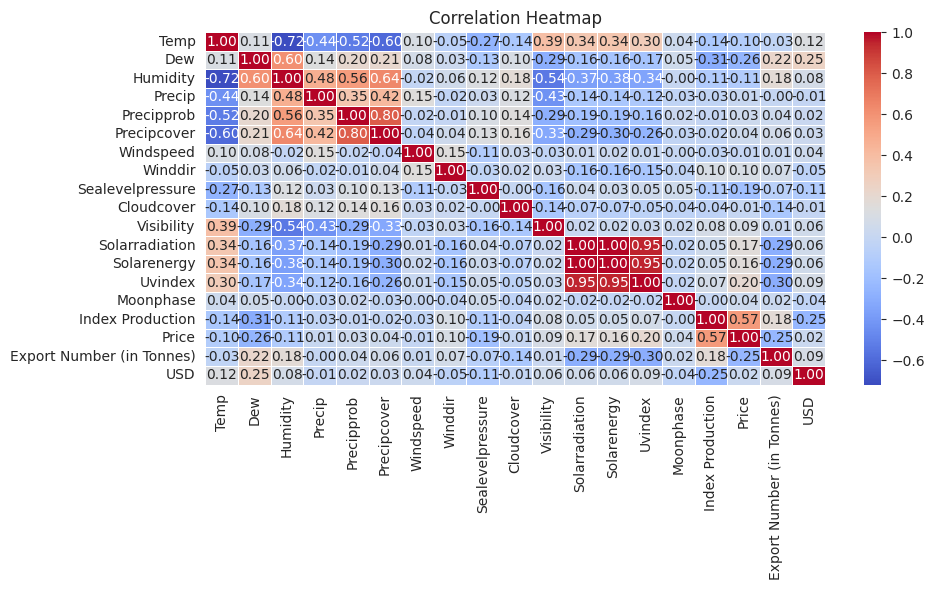

In [39]:
corr = df.drop(columns=['Date']).corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

**Box Plot (Outlier)**

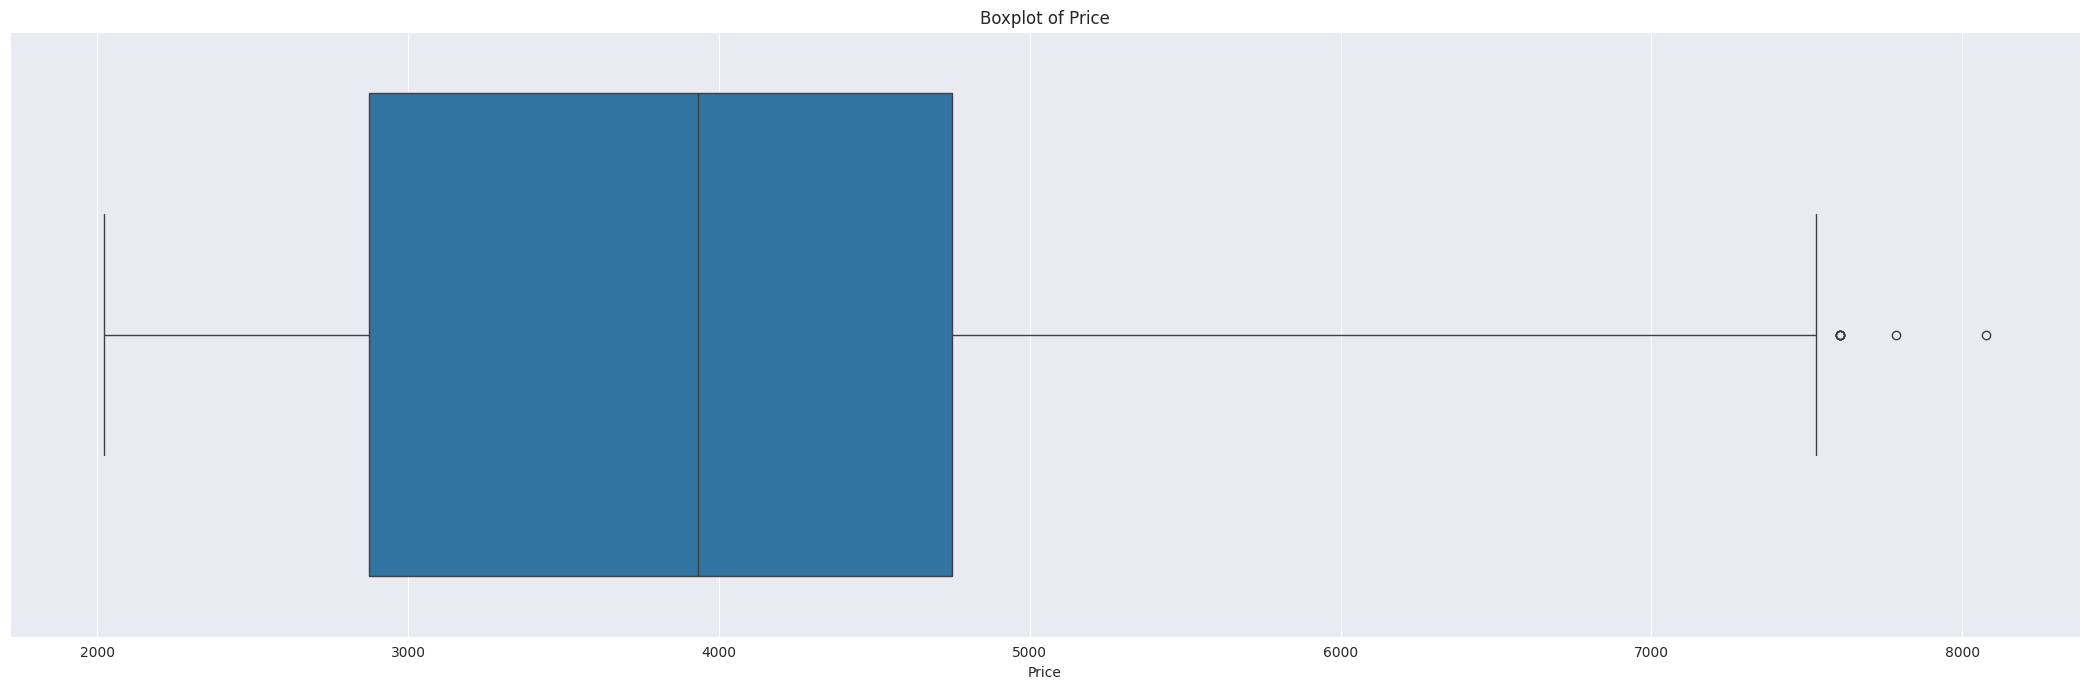

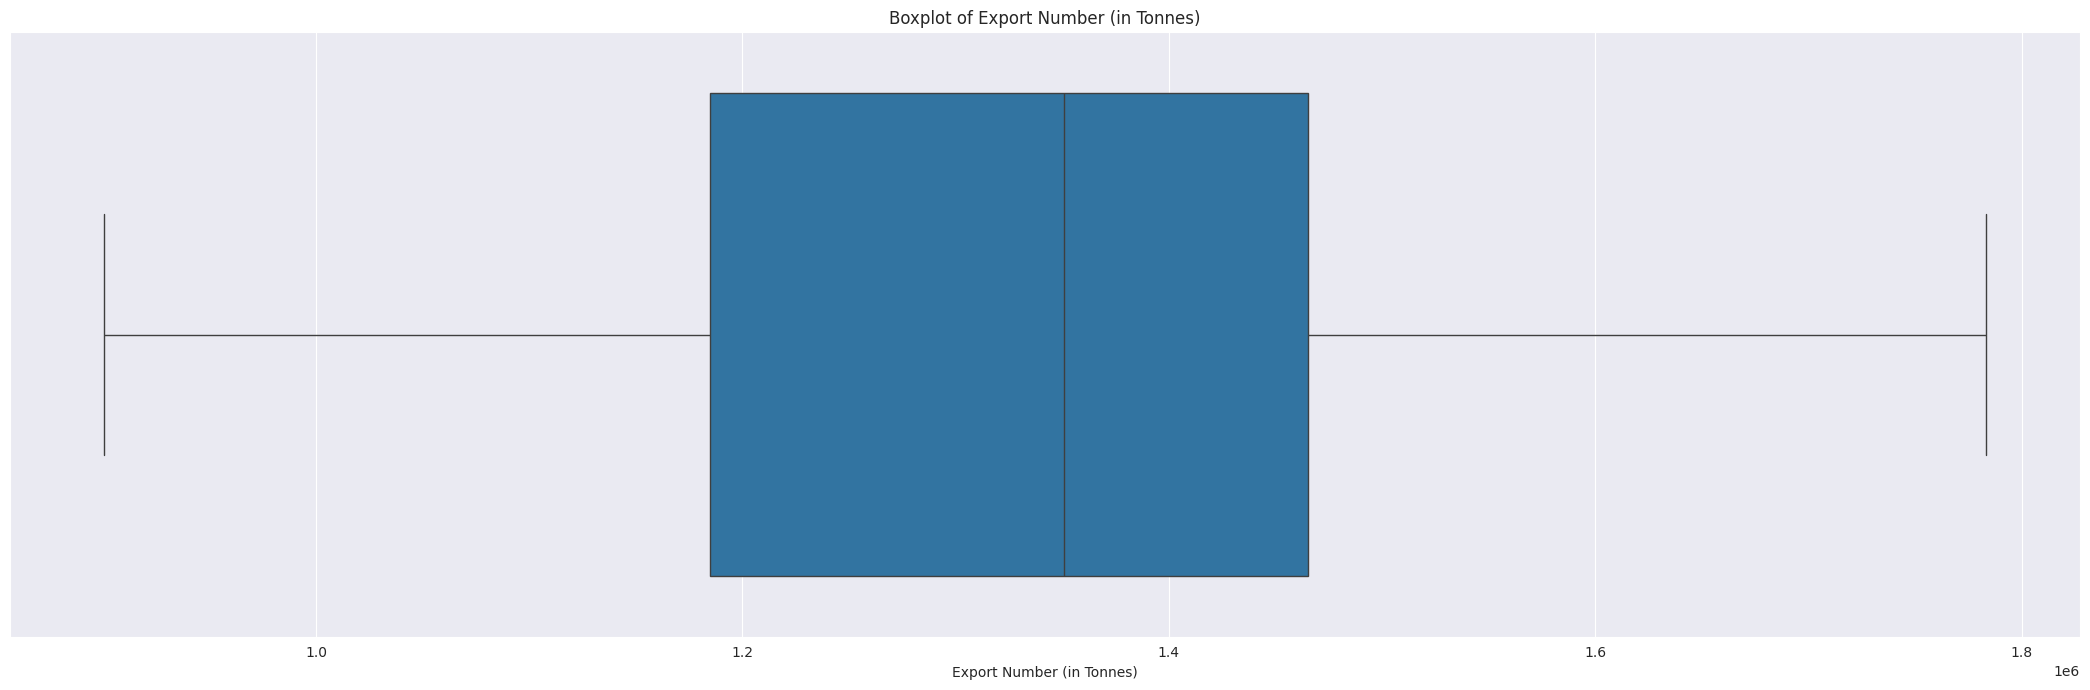

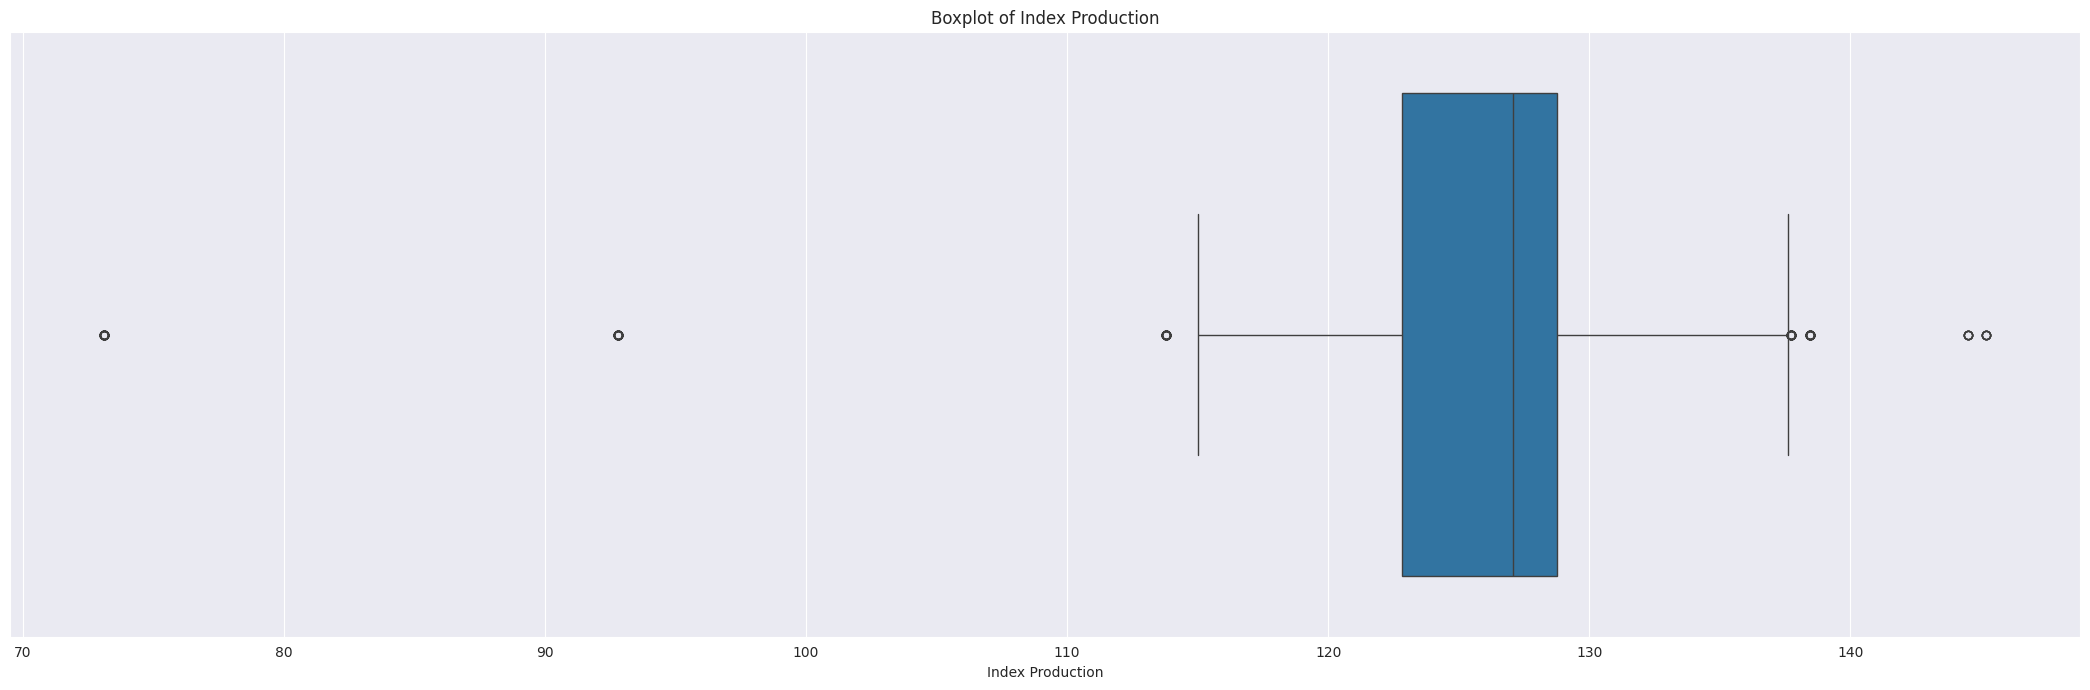

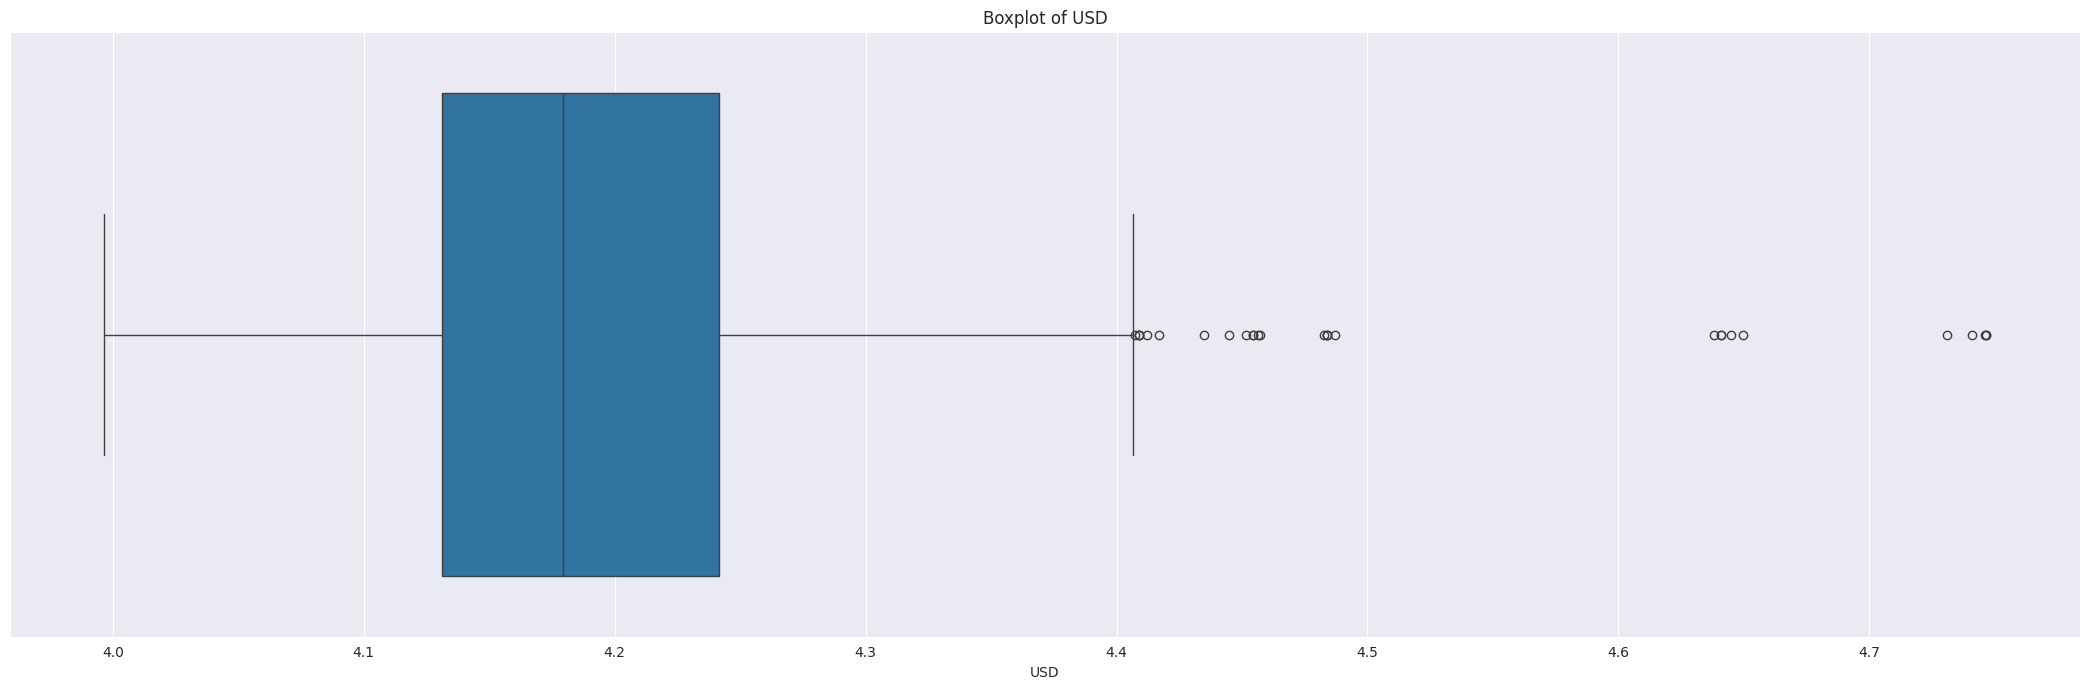

In [40]:
plt.figure(figsize=(21, 7))
sns.boxplot(x=df['Price'])
plt.title("Boxplot of Price")
plt.tight_layout()
plt.show()

plt.figure(figsize=(21, 7))
sns.boxplot(x=df['Export Number (in Tonnes)'])
plt.title("Boxplot of Export Number (in Tonnes)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(21, 7))
sns.boxplot(x=df['Index Production'])
plt.title("Boxplot of Index Production")
plt.tight_layout()
plt.show()

plt.figure(figsize=(21, 7))
sns.boxplot(x=df['USD'])
plt.title("Boxplot of USD")
plt.tight_layout()
plt.show()

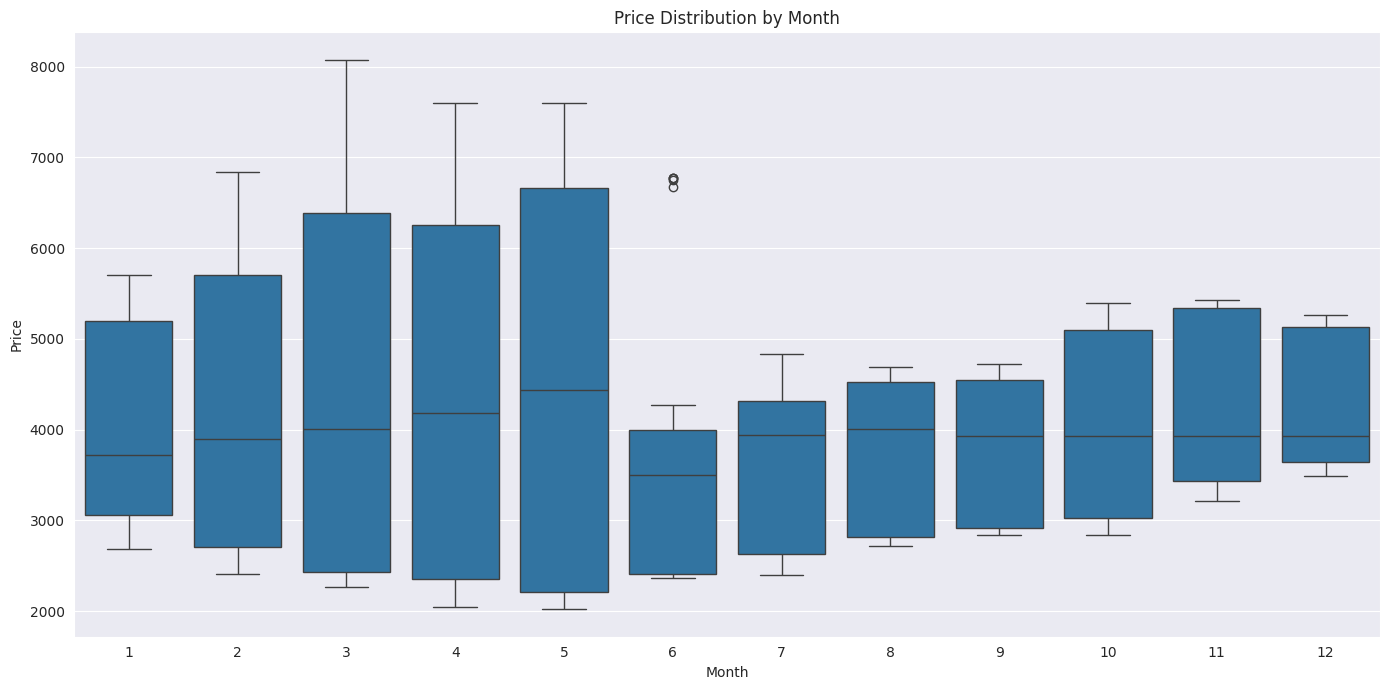

In [41]:
df['Month'] = df['Date'].dt.month

plt.figure(figsize=(14, 7))
sns.boxplot(x='Month', y='Price', data=df)
plt.title("Price Distribution by Month")
plt.xlabel("Month")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

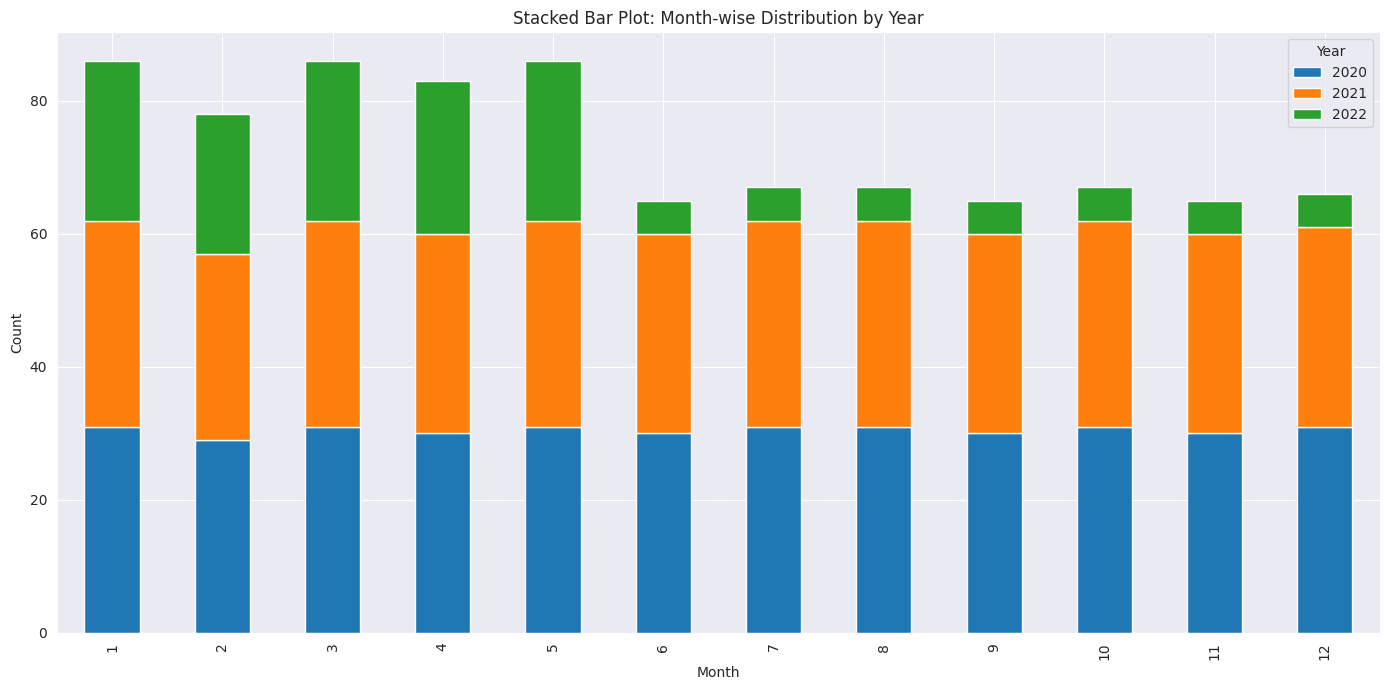

In [42]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

month_year_dist = df.groupby(['Year', 'Month']).size().unstack().T

month_year_dist.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Stacked Bar Plot: Month-wise Distribution by Year')
plt.xlabel('Month')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Time Series Comparison (Yearly Trends)**

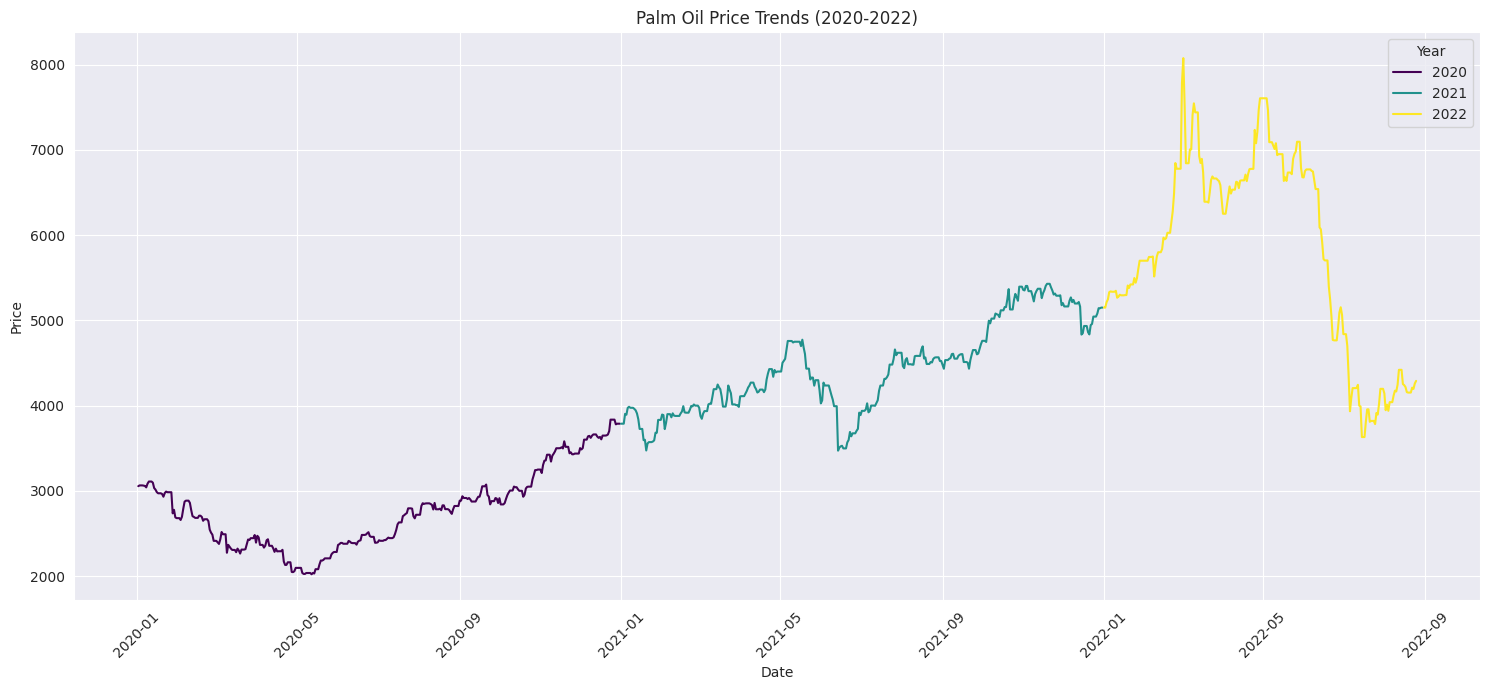

In [43]:
# Use the already combined all_prices_df
combined_price_df = all_prices_df.copy()

# Apply forward-fill to propagate the last valid observation forward
combined_price_df['Price'] = combined_price_df['Price'].ffill()

# Drop rows where 'Price' is NaN after ffill, if any remain (e.g., at the very beginning)
combined_price_df.dropna(subset=['Price'], inplace=True)

# Add Year column for hue plotting
combined_price_df['Year'] = combined_price_df['Date'].dt.year

# Create the line plot
plt.figure(figsize=(15, 7))
sns.lineplot(data=combined_price_df, x='Date', y='Price', hue='Year', palette='viridis')
plt.title('Palm Oil Price Trends (2020-2022)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend(title='Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **FEATURE ENGINEERING**

In [44]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [45]:
X = df[['Temp', 'Dew', 'Humidity', 'Precip', 'Precipprob', 'Precipcover',
       'Windspeed', 'Winddir', 'Sealevelpressure', 'Cloudcover', 'Visibility',
       'Solarradiation', 'Solarenergy', 'Uvindex', 'Moonphase',
       'Index Production', 'Export Number (in Tonnes)', 'USD', 'Year',
       'Month']]
y = df['Price']

The dataset was divided into target(y) which is 'Price' and features(X)  which are all the variables except the column of 'Price'.

In [46]:
corr = X.corrwith(y)
print(corr)

Temp                        -0.097243
Dew                         -0.261865
Humidity                    -0.110260
Precip                       0.010596
Precipprob                   0.034273
Precipcover                  0.038091
Windspeed                   -0.011008
Winddir                      0.096375
Sealevelpressure            -0.189976
Cloudcover                  -0.006826
Visibility                   0.087801
Solarradiation               0.166938
Solarenergy                  0.160315
Uvindex                      0.197725
Moonphase                    0.036997
Index Production             0.565932
Export Number (in Tonnes)   -0.248320
USD                          0.021412
Year                         0.873891
Month                        0.002725
dtype: float64


Shows that the strength and direction of the linear relationship between each feature and the target variable (export number)

Year has the strongest positive correlation with 0.6825, suggesting price tend to increase over time, possibly reflecting long term trends.

Index Production has moderate positive correlation with 0.4501,indicating that higher production levels are associated with higher prices of palm oil.

The UV index, Solar Radiation and Solar Energy variables show a weak porsitive correlations, with values of 0.1731, 0.1328 and 0.1338, respectively. This indicates that sunny conditions might slightly influence price of palm oil.

While, Dew and Sea Level Pressure with correlations -0.2181 and -0.1447 respectively will slightly correspond to lower prices of palm oil. This indicates that the higher moisture and pressure will result the low prices.

Variables such as Temperature, Humidity, windspeed and Precipitation have very weak negative correlations which are -0.0677, -0.1045, -0.0441 and -0.0182 respectively, indicating no affect to prices.

Variables such as Month, cloud cover, moon phase, precipitation cover, usd and wind direction, showing that these variables are irrelevant for predicting price since their correlation are very weak.

Therefore, the features such as 'Dew', 'Humidity', 'Sealevelpressure', 'Solarradiation', 'Solarenergy', 'Uvindex', 'Index Production', 'Export Number (in Tonnes)' and 'Year' have more impact on targeted variable (Price).

## **FEATURE SELECTION**

In [47]:
from sklearn.feature_selection import f_classif

anova_results = []
for feature in X.columns:
  F, p = f_classif(X[[feature]], y)
  anova_results.append({'Feature': feature, 'F-value': F[0], 'p-value': p[0]})
anova_results = pd.DataFrame(anova_results).sort_values(by='p-value')
print("\nANOVA Results (Numerical Features):")
display(anova_results)


ANOVA Results (Numerical Features):


,Feature,F-value,p-value
15,Index Production,22.386707,5.332285e-141
16,Export Number (in Tonnes),10.779890,1.258274e-93
19,Month,9.228294,4.101243e-84
17,USD,7.220901,1.185913e-69
14,Moonphase,3.717457,3.846180e-35
1,Dew,2.801690,3.087279e-23
9,Cloudcover,2.300776,3.187082e-16
0,Temp,1.784012,5.877043e-09
2,Humidity,1.780088,6.645584e-09
8,Sealevelpressure,1.731867,2.977592e-08


In [48]:
# Select features with p-value < 0.05 from ANOVA results
selected_features_anova = anova_results[anova_results['p-value'] < 0.05]['Feature'].tolist()

# Create X_selected using these features from the original X
X_selected = X[selected_features_anova]

X_selected.columns

Index(['Index Production', 'Export Number (in Tonnes)', 'Month', 'USD',
       'Moonphase', 'Dew', 'Cloudcover', 'Temp', 'Humidity',
       'Sealevelpressure', 'Visibility', 'Uvindex', 'Solarradiation',
       'Solarenergy', 'Precipcover', 'Precipprob', 'Precip'],
      dtype='object')

In [49]:
selected_features = corr[abs(corr) >= 0.1].index
print(selected_features)

X_selected = X[selected_features]

Index(['Dew', 'Humidity', 'Sealevelpressure', 'Solarradiation', 'Solarenergy',
       'Uvindex', 'Index Production', 'Export Number (in Tonnes)', 'Year'],
      dtype='object')


## **PARTITIONING**

The dataset was split into training and testing sets with ratio 80:20.

X_train and y_train are used to to train the model while X_test and y_test are reserved for evaluating the model's performance on unseen data.


In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

## **FEATURE SCALING**

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

# Initialize scaler and RFE estimator
scaler = StandardScaler()
estimator = LinearRegression()

In [52]:
X = df.drop(columns=['Price'])
y = df['Price']

In [53]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Then the features are standardized using StandardScaler. The training and testing set were scaled to have mean 0 and sd 1 to make sure all features are on the same scale to improve model performance and stability.

##  **Decision Tree Regressor**

In [54]:
dt = DecisionTreeRegressor(
    max_depth=4,
    min_samples_leaf=10,
    random_state=42
)
start_time = time.time()
dt.fit(X_train_scaled, y_train)
end_time = time.time()
training_time_dt = end_time - start_time

In [55]:
dt_pred = dt.predict(X_test_scaled)

rmse_dt = np.sqrt(mean_squared_error(y_test, dt_pred))
r2_dt = r2_score(y_test, dt_pred)
mae_dt = mean_absolute_error(y_test, dt_pred)

print(f"Mean Squared Error (dt): {rmse_dt}")
print(f"MAE (dt): {mae_dt}")
print(f"R-squared (dt): {r2_dt}")

Mean Squared Error (dt): 359.7192285244365
MAE (dt): 231.93375623775057
R-squared (dt): 0.9337932274173413


**Grid Search Tuning parameters for Decision Tree Regressor**

In [56]:
param_grid = {
       'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
       'max_depth': [None, 5, 10, 15, 20],
       'min_samples_split': [2, 5, 10],
       'min_samples_leaf': [1, 2, 4]
             }

grid_search = GridSearchCV(estimator=dt,
                              param_grid=param_grid,
                              cv=5,  # Number of cross-validation folds
                              scoring='neg_mean_squared_error',  # Evaluation metric
                              verbose=1)

grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params_dt = grid_search.best_params_
best_score_dt = grid_search.best_score_
best_rmse_dt = np.sqrt(-best_score_dt)
best_dt_model=grid_search.best_estimator_
print(f"Best parameters for Decision Tree: {best_params_dt}")
print(f"Best cross-validation accuracy (Decision Tree): {best_rmse_dt:.4f}")

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters for Decision Tree: {'criterion': 'squared_error', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best cross-validation accuracy (Decision Tree): 205.0925


In [57]:
dt_tuned = DecisionTreeRegressor(
    max_depth=5,
    min_samples_leaf=4,
    min_samples_split=10,
    criterion='squared_error',
    random_state=42
)
start_time = time.time()
dt_tuned.fit(X_train_scaled, y_train)
end_time = time.time()
training_time_dt_tuned = end_time - start_time

dt_tuned_pred = dt_tuned.predict(X_test_scaled)

rmse_dt_tuned = np.sqrt(mean_squared_error(y_test, dt_tuned_pred))
r2_dt_tuned = r2_score(y_test, dt_tuned_pred)
mae_dt_tuned = mean_absolute_error(y_test, dt_tuned_pred)

print(f"Mean Squared Error (dt): {rmse_dt_tuned}")
print(f"MAE (dt): {mae_dt_tuned}")
print(f"R-squared (dt): {r2_dt_tuned}")

Mean Squared Error (dt): 291.94273293194715
MAE (dt): 195.99745034376826
R-squared (dt): 0.9563915702008376


## **Random Forest Regressor**

In [58]:
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=5,
    min_samples_leaf=5,
    random_state=42
)
start_time = time.time()
rf.fit(X_train_scaled, y_train)
end_time = time.time()
training_time_rf = end_time - start_time

In [75]:
rf_pred = rf.predict(X_test_scaled)
rf_pred2 = rf.predict(X_train_scaled)

rmse_rf2 = np.sqrt(mean_squared_error(y_train, rf_pred2))
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_pred))
r2_rf2 = r2_score(y_train, rf_pred2)
r2_rf = r2_score(y_test, rf_pred)
mae_rf2 = mean_absolute_error(y_train, rf_pred2)
mae_rf = mean_absolute_error(y_test, rf_pred)

print(f"Mean Squared Error (RF) train: {rmse_rf2}")
print(f"Mean Squared Error (RF)test: {rmse_rf}")
print(f"MAE train: {mae_rf2}")
print(f"MAE test: {mae_rf}")
print(f"R-squared (RF) train: {r2_rf2}")
print(f"R-squared (RF) test: {r2_rf}")

Mean Squared Error (RF) train: 251.30592323674998
Mean Squared Error (RF)test: 260.6427657725193
MAE train: 159.20675709447124
MAE test: 175.19323735861843
R-squared (RF) train: 0.9639071851443347
R-squared (RF) test: 0.9652410649627394


In [60]:
param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}


grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid_rf,
                           cv=5,  # Number of cross-validation folds
                           scoring='neg_mean_squared_error',
                           verbose=1)

grid_search.fit(X_train_scaled, y_train)
# Get the best parameters and best score
best_params_rf = grid_search.best_params_
best_score_rf = grid_search.best_score_
best_rmse_rf = np.sqrt(-best_score_rf)
best_rf_model=grid_search.best_estimator_
print(f"Best parameters for Random Forest: {best_params_rf}")
print(f"Best cross-validation accuracy (Random Forest): {best_rmse_rf:.4f}")

rf_tuned = RandomForestRegressor(
    n_estimators=best_params_rf['n_estimators'],
    max_depth=best_params_rf['max_depth'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    min_samples_split=best_params_rf['min_samples_split'],
    random_state=42
)
start_time = time.time()
rf_tuned.fit(X_train_scaled, y_train)
end_time = time.time()
training_time_rf_tuned = end_time - start_time

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation accuracy (Random Forest): 217.1985


In [78]:
rf_tuned_pred = rf_tuned.predict(X_test_scaled)
rf_tuned_pred2 = rf_tuned.predict(X_train_scaled)

rmse_rf_tuned = np.sqrt(mean_squared_error(y_test, rf_tuned_pred))
r2_rf_tuned = r2_score(y_test, rf_tuned_pred)
r2_rf_tuned2 = r2_score(y_train, rf_tuned_pred2)
mae_rf_tuned = mean_absolute_error(y_test, rf_tuned_pred)

print(f"Mean Squared Error (RF): {rmse_rf_tuned}")
print(f"MAE: {mae_rf_tuned}")
print(f"R-squared (RF) Train: {r2_rf_tuned2}")
print(f"R-squared (RF) Test: {r2_rf_tuned}")

Mean Squared Error (RF): 173.52219743505879
MAE: 117.4582873530097
R-squared (RF) Train: 0.9964672879511609
R-squared (RF) Test: 0.984594166900034


## **XGBoost**

In [80]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

xgb = XGBRegressor(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
start_time = time.time()
xgb.fit(X_train_scaled, y_train)
xgb_pred = xgb.predict(X_test_scaled)
xgb_pred2 = xgb.predict(X_train_scaled)
end_time = time.time()
training_time_xgb = end_time - start_time

In [81]:
rmse_xgb = np.sqrt(mean_squared_error(y_test, xgb_pred))
mae_xgb = mean_absolute_error(y_test, xgb_pred)
r2_xgb = r2_score(y_test, xgb_pred)
r2_xgb2 = r2_score(y_train, xgb_pred2)

print(f"RMSE (XGBoost): {rmse_xgb}")
print(f"MAE (XGBoost): {mae_xgb}")
print(f"R-squared (XGBoost) test: {r2_xgb}")
print(f"R-squared (XGBoost) train: {r2_xgb2}")

RMSE (XGBoost): 192.21586881820278
MAE (XGBoost): 133.9266833289195
R-squared (XGBoost) test: 0.9810960052106971
R-squared (XGBoost) train: 0.9991343192602573


In [82]:
param_grid_xgb_reg = {
    'objective': ['reg:squarederror', 'reg:absoluteerror'],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1]
}
grid_search = GridSearchCV(estimator=xgb,
                              param_grid=param_grid_xgb_reg,
                              cv=5,  # Number of cross-validation folds
                              scoring='neg_mean_squared_error',  # Evaluation metric
                              verbose=1)

grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params_xgb = grid_search.best_params_
best_score_xgb = grid_search.best_score_
best_rmse_xgb = np.sqrt(-best_score_xgb)
best_xgb_model=grid_search.best_estimator_
print(f"Best parameters for XGBoost: {best_params_xgb}")
print(f"Best cross-validation accuracy (XGBoost): {best_rmse_xgb:.4f}")

xgb_tuned = XGBRegressor(
    max_depth=best_params_xgb['max_depth'],
    learning_rate=best_params_xgb['learning_rate'],
    random_state=42
)
start_time = time.time()
xgb_tuned.fit(X_train_scaled, y_train)
end_time = time.time()
training_time_xgb_tuned = end_time - start_time

xgb_tuned_pred = xgb_tuned.predict(X_test_scaled)
xgb_tuned_pred2 = xgb_tuned.predict(X_train_scaled)

rmse_xgb_tuned = np.sqrt(mean_squared_error(y_test, xgb_tuned_pred))
r2_xgb_tuned = r2_score(y_test, xgb_tuned_pred)
r2_xgb_tuned2 = r2_score(y_train, xgb_tuned_pred2)
mae_xgb_tuned = mean_absolute_error(y_test, xgb_tuned_pred)

print(f"Mean Squared Error (tuned xgb): {rmse_xgb_tuned}")
print(f"MAE (tuned xgb): {mae_xgb_tuned}")
print(f"R-squared (tuned xgb): {r2_xgb_tuned}")
print(f"R-squared (tuned xgb) train: {r2_xgb_tuned2} ")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'objective': 'reg:squarederror'}
Best cross-validation accuracy (XGBoost): 220.1465
Mean Squared Error (tuned xgb): 208.75450401112494
MAE (tuned xgb): 129.99071438029662
R-squared (tuned xgb): 0.9777029801837956
R-squared (tuned xgb) train: 0.9993651788544167 


## **Gradient Boosting Regressor**

In [65]:
gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)
start_time = time.time()
gbr.fit(X_train_scaled, y_train)
end_time = time.time()
training_time_gbr = end_time - start_time

In [66]:
gbr_pred = gbr.predict(X_test_scaled)

rmse_gbr = np.sqrt(mean_squared_error(y_test, gbr_pred))
r2_gbr = r2_score(y_test, gbr_pred)
mae_gbr = mean_absolute_error(y_test, gbr_pred)

print(f"Mean Squared Error (gbr): {rmse_gbr}")
print(f"MAE (gbr): {mae_gbr}")
print(f"R-squared (gbr): {r2_gbr}")

Mean Squared Error (gbr): 206.7842172904466
MAE (gbr): 138.52911959203885
R-squared (gbr): 0.9781218856624162


In [67]:
param_grid_gbr_reg = {
    'criterion': ['friedman_mse', 'squared_error'],
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

grid_search = GridSearchCV(estimator=gbr,
                              param_grid=param_grid_gbr_reg,
                              cv=5,  # Number of cross-validation folds
                              scoring='neg_mean_squared_error',  # Evaluation metric
                              verbose=1)

grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params_gbr = grid_search.best_params_
best_score_gbr = grid_search.best_score_
best_rmse_gbr = np.sqrt(-best_score_gbr)
best_gbr_model=grid_search.best_estimator_
print(f"Best parameters for Decision Tree: {best_params_gbr}")
print(f"Best cross-validation accuracy (Decision Tree): {best_rmse_gbr:.4f}")

gbr_tuned = GradientBoostingRegressor(
    n_estimators=best_params_gbr['n_estimators'],
    learning_rate=best_params_gbr['learning_rate'],
    max_depth=best_params_gbr['max_depth'],
    random_state=42
)
start_time = time.time()
gbr_tuned.fit(X_train_scaled, y_train)
end_time = time.time()
training_time_gbr_tuned= end_time - start_time

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters for Decision Tree: {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best cross-validation accuracy (Decision Tree): 211.6268


In [68]:
gbr_tuned_pred = gbr_tuned.predict(X_test_scaled)

rmse_gbr_tuned = np.sqrt(mean_squared_error(y_test, gbr_tuned_pred))
r2_gbr_tuned = r2_score(y_test, gbr_tuned_pred)
mae_gbr_tuned = mean_absolute_error(y_test, gbr_tuned_pred)

print(f"Mean Squared Error (gbr): {rmse_gbr_tuned}")
print(f"MAE (gbr): {mae_gbr_tuned}")
print(f"R-squared (gbr): {r2_gbr_tuned}")

Mean Squared Error (gbr): 199.76060878388483
MAE (gbr): 135.0666592791633
R-squared (gbr): 0.9795828642318


## **Support Vector Regression (SVR)**

In [69]:
svr = make_pipeline(
    StandardScaler(),
    SVR(kernel='rbf', C=100, epsilon=0.1)
)
start_time = time.time()
svr.fit(X_train_scaled, y_train)
end_time = time.time()
training_time_svr = end_time - start_time

In [70]:
svr_pred = svr.predict(X_test_scaled)

rmse_svr = np.sqrt(mean_squared_error(y_test, svr_pred))
r2_svr = r2_score(y_test, svr_pred)
mae_svr = mean_absolute_error(y_test, svr_pred)

print(f"RMSE (SVR): {rmse_svr}")
print(f"MAE (SVR): {mae_svr}")
print(f"R-squared (SVR): {r2_svr}")


RMSE (SVR): 705.0508040560721
MAE (SVR): 486.96268951547864
R-squared (SVR): 0.7456592571662432


## **Comparison of Results**

In [71]:
results_df = pd.DataFrame({
    'Model': [
        'XGBoost',
        'SVR',
        'Random Forest',
        'Gradient Boosting',
        'Decision Tree',
        'Decision Tree (Tuned)',
        'XGBoost (Tuned)',
        'Random Forest (Tuned)',
        'Gradient Boosting Regressor (Tuned)'
    ],
    'RMSE': [rmse_xgb, rmse_svr, rmse_rf, rmse_gbr, rmse_dt, rmse_dt_tuned, rmse_xgb_tuned, rmse_rf_tuned, rmse_gbr_tuned],
    'MAE': [mae_xgb, mae_svr, mae_rf, mae_gbr, mae_dt, mae_dt_tuned, mae_xgb_tuned, mae_rf_tuned, mae_gbr_tuned],
    'R-squared': [r2_xgb, r2_svr, r2_rf, r2_gbr, r2_dt, r2_dt_tuned, r2_xgb_tuned, r2_rf_tuned, r2_gbr_tuned],
    'Training Time (s)':[
        training_time_xgb,
        training_time_svr,
        training_time_dt,
        training_time_gbr,
        training_time_dt,
        training_time_dt_tuned,
        training_time_xgb_tuned,
        training_time_rf_tuned,
        training_time_gbr_tuned
    ]
})

results_df = results_df.sort_values(by='R-squared', ascending=False).reset_index(drop=True)
display(results_df)

,Model,RMSE,MAE,R-squared,Training Time (s)
0,Random Forest (Tuned),173.522197,117.458287,0.984594,0.912697
1,XGBoost,192.215869,133.926683,0.981096,0.211471
2,Gradient Boosting Regressor (Tuned),199.760609,135.066659,0.979583,0.443236
3,Gradient Boosting,206.784217,138.529120,0.978122,0.916159
4,XGBoost (Tuned),208.754504,129.990714,0.977703,0.185155
5,Random Forest,260.642766,175.193237,0.965241,0.009772
6,Decision Tree (Tuned),291.942733,195.997450,0.956392,0.005429
7,Decision Tree,359.719229,231.933756,0.933793,0.009772
8,SVR,705.050804,486.962690,0.745659,0.062115


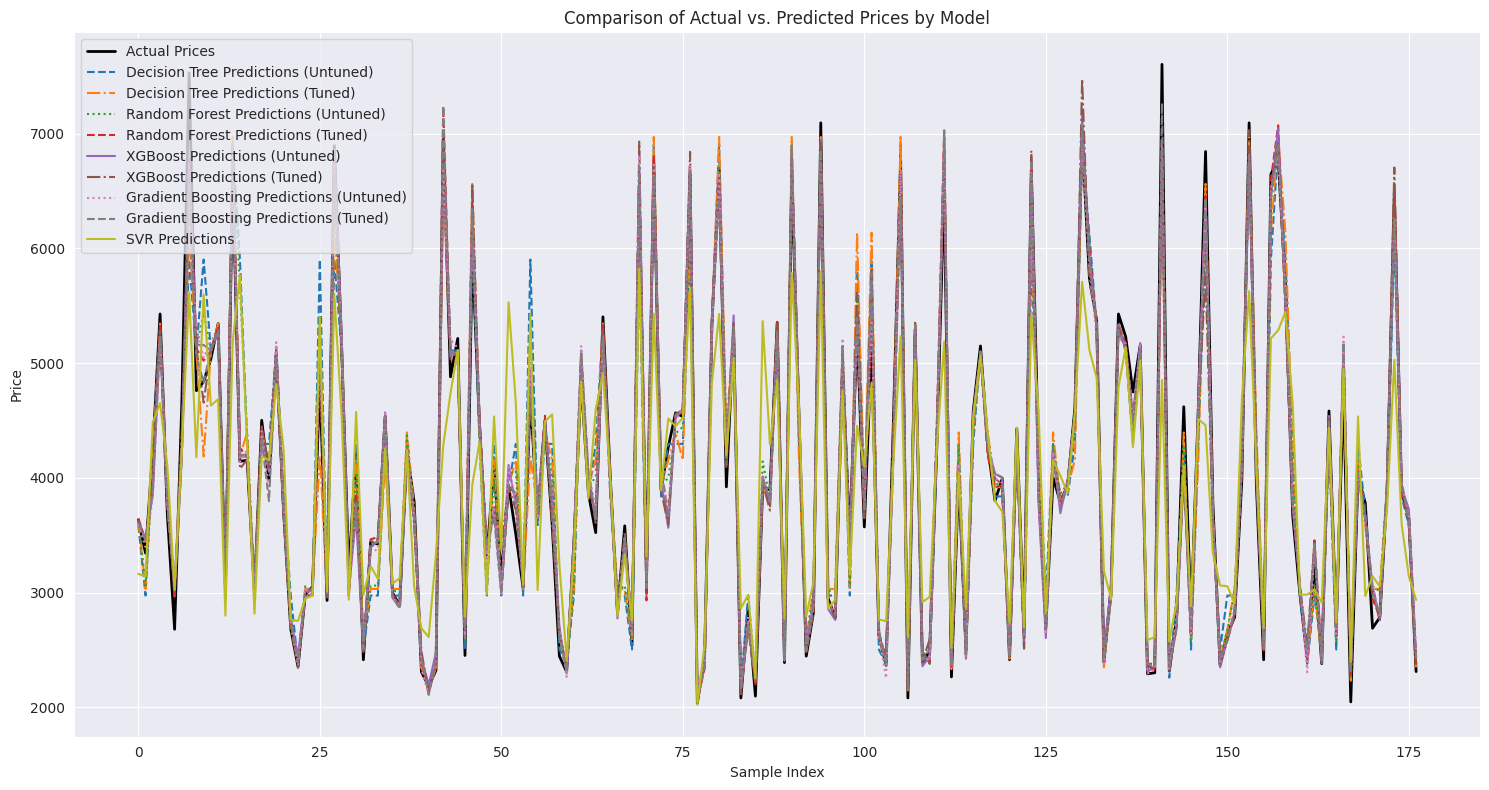

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and all prediction variables (dt_pred, rf_pred, etc.) are available from previous cells

plt.figure(figsize=(15, 8))

# Plot actual values
plt.plot(np.arange(len(y_test)), y_test.values, label='Actual Prices', color='black', linewidth=2)

# Plot predictions from each model
plt.plot(np.arange(len(y_test)), dt_pred, label='Decision Tree Predictions (Untuned)', linestyle='--')
plt.plot(np.arange(len(y_test)), dt_tuned_pred, label='Decision Tree Predictions (Tuned)', linestyle='-.')
plt.plot(np.arange(len(y_test)), rf_pred, label='Random Forest Predictions (Untuned)', linestyle=':')
plt.plot(np.arange(len(y_test)), rf_tuned_pred, label='Random Forest Predictions (Tuned)', linestyle='--')
plt.plot(np.arange(len(y_test)), xgb_pred, label='XGBoost Predictions (Untuned)', linestyle='-')
plt.plot(np.arange(len(y_test)), xgb_tuned_pred, label='XGBoost Predictions (Tuned)', linestyle='-.')
plt.plot(np.arange(len(y_test)), gbr_pred, label='Gradient Boosting Predictions (Untuned)', linestyle=':')
plt.plot(np.arange(len(y_test)), gbr_tuned_pred, label='Gradient Boosting Predictions (Tuned)', linestyle='--')
plt.plot(np.arange(len(y_test)), svr_pred, label='SVR Predictions', linestyle='-')

plt.title('Comparison of Actual vs. Predicted Prices by Model')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

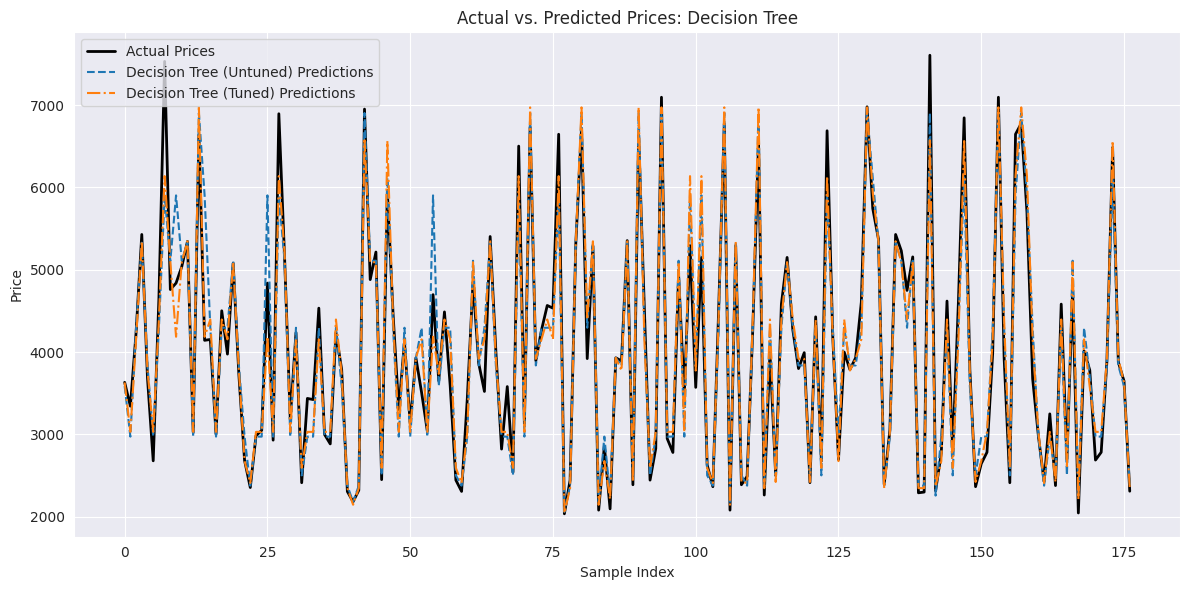

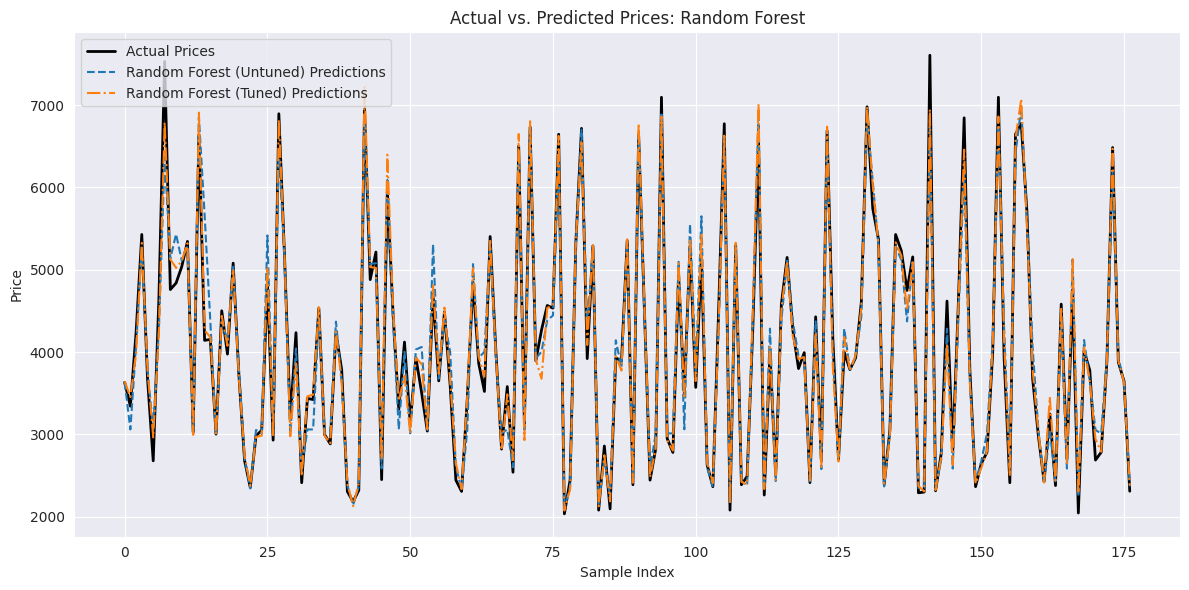

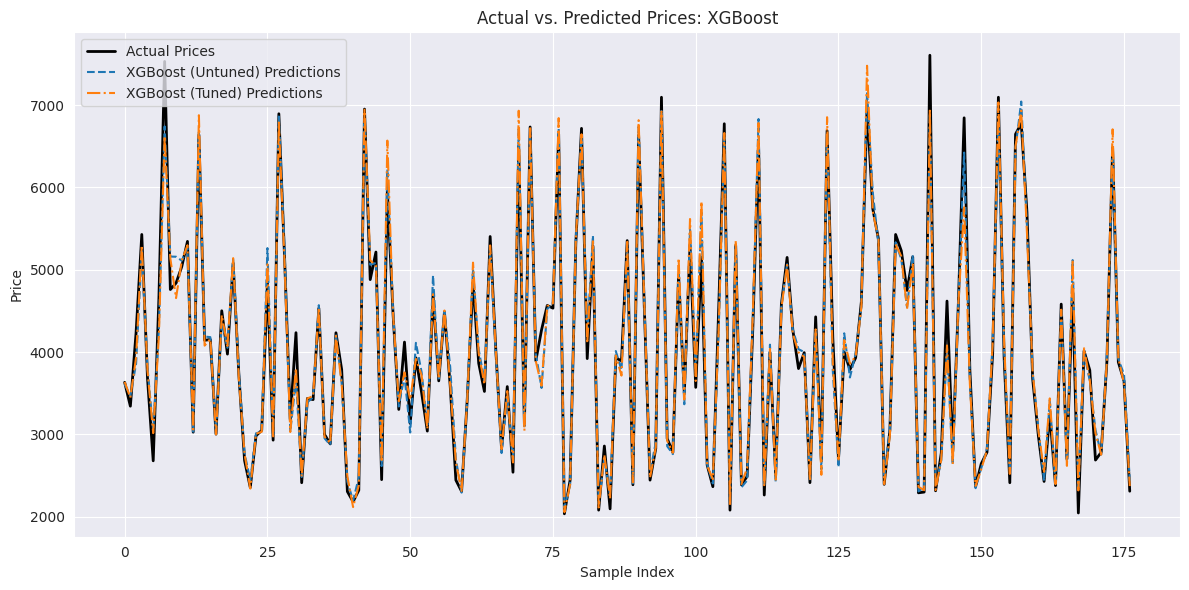

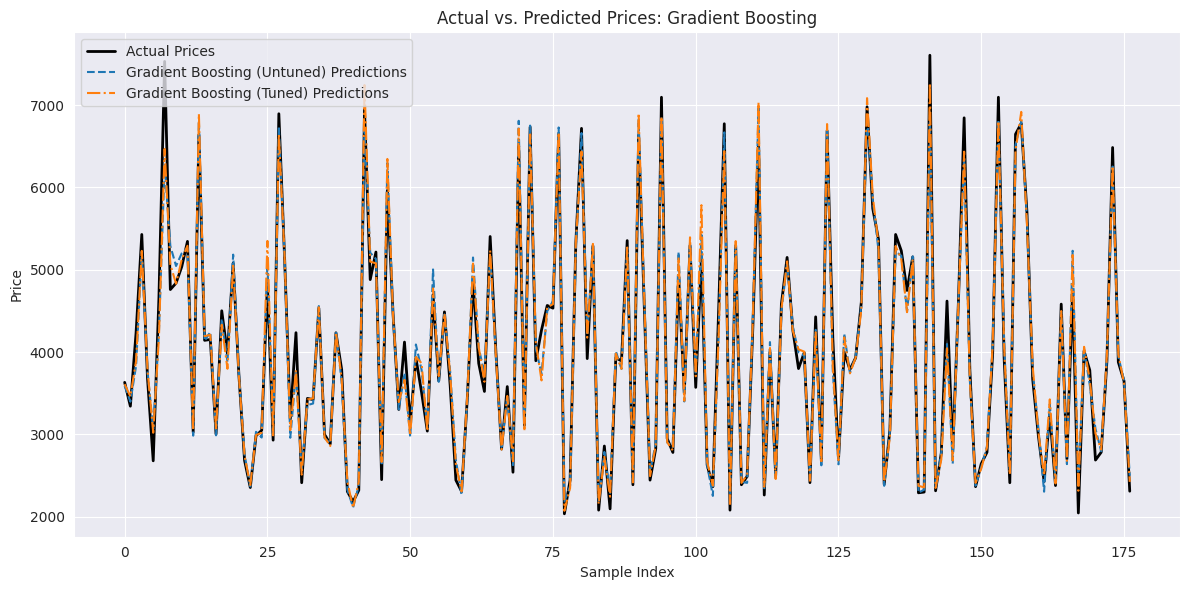

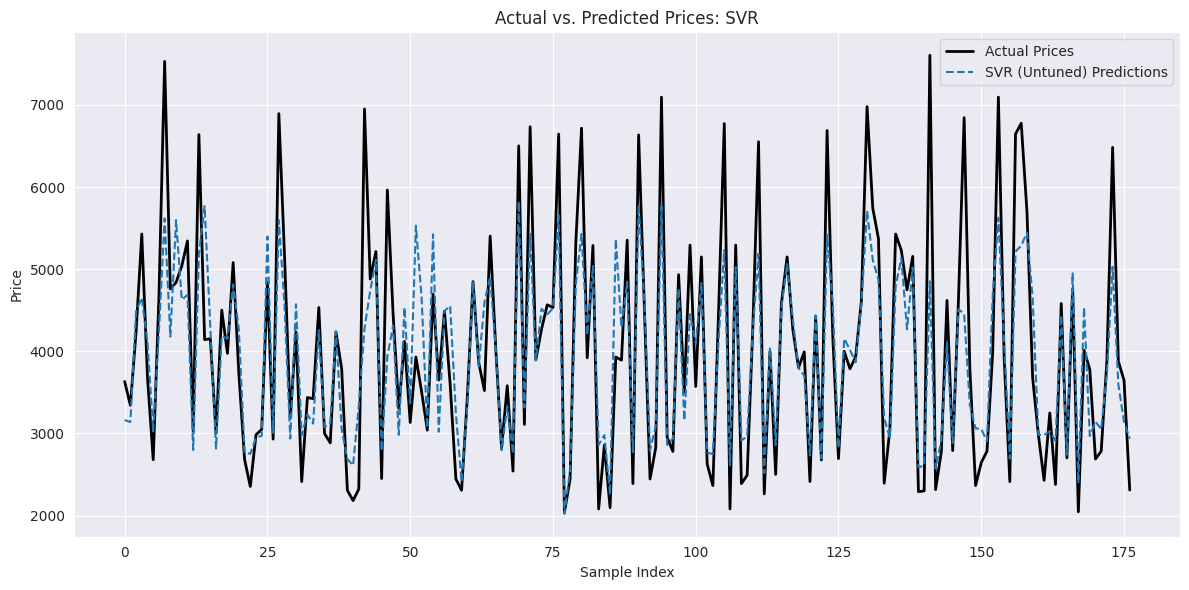

In [73]:
# Helper function to plot actual vs. predicted for a single model
def plot_model_predictions(actual_prices, untuned_preds, tuned_preds=None, model_name='Model'):
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(len(actual_prices)), actual_prices.values, label='Actual Prices', color='black', linewidth=2)
    plt.plot(np.arange(len(actual_prices)), untuned_preds, label=f'{model_name} (Untuned) Predictions', linestyle='--')
    if tuned_preds is not None:
        plt.plot(np.arange(len(actual_prices)), tuned_preds, label=f'{model_name} (Tuned) Predictions', linestyle='-.')

    plt.title(f'Actual vs. Predicted Prices: {model_name}')
    plt.xlabel('Sample Index')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Decision Tree Regressor
plot_model_predictions(y_test, dt_pred, dt_tuned_pred, model_name='Decision Tree')

# Random Forest Regressor
plot_model_predictions(y_test, rf_pred, rf_tuned_pred, model_name='Random Forest')

# XGBoost
plot_model_predictions(y_test, xgb_pred, xgb_tuned_pred, model_name='XGBoost')

# Gradient Boosting Regressor
plot_model_predictions(y_test, gbr_pred, gbr_tuned_pred, model_name='Gradient Boosting')

# SVR (only untuned version)
plot_model_predictions(y_test, svr_pred, model_name='SVR')


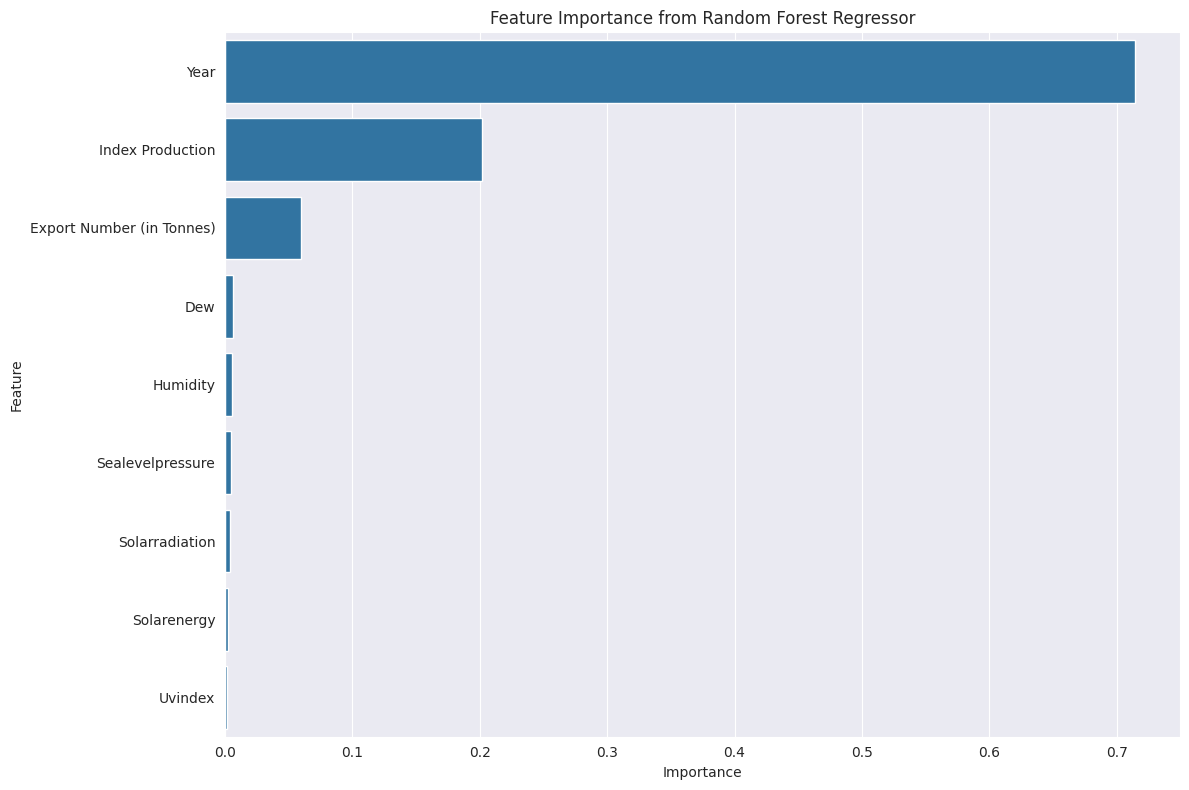

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the best Random Forest model
# Assuming 'best_rf_model' is available from the previous grid search cell
feature_importances = best_rf_model.feature_importances_

# Get feature names from the X_selected dataframe
features = X_selected.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()